I want to separate the data when the participant is watching the AR modules and when he is solving the Answers

Started working on Madeline Experiment 2

In [1]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('Centerofmassmad2.xlsx', engine='openpyxl')

# Show the first few rows to understand what the data looks like
print("First few rows of the dataframe:")
print(df.head())

# Describe the data to get statistical information
print("Statistical description of the dataframe:")
print(df.describe())

# If you want to describe a specific column, you can do it like this:
print("Statistical description of the 'CoM pos x' column:")
print(df['CoM pos x'].describe())


First few rows of the dataframe:
   Frame  CoM pos x  CoM pos y  CoM pos z  CoM vel x  CoM vel y  CoM vel z  \
0      0   0.007353  -0.003661   1.301606   0.017183  -0.011271   0.037706   
1      1   0.007359  -0.003670   1.301593   0.017870  -0.011417   0.037733   
2      2   0.007365  -0.003679   1.301580   0.018629  -0.011362   0.037729   
3      3   0.007374  -0.003694   1.301569   0.018982  -0.011021   0.037629   
4      4   0.007388  -0.003718   1.301558   0.019632  -0.010692   0.037356   

   CoM acc x  CoM acc y  CoM acc z  
0   0.018027  -0.034695   0.062314  
1  -0.004537  -0.027648   0.001115  
2  -0.011920  -0.008697  -0.008195  
3   0.072040   0.017277  -0.030860  
4  -0.013541   0.029065  -0.043529  
Statistical description of the dataframe:
               Frame      CoM pos x      CoM pos y      CoM pos z  \
count  148230.000000  148230.000000  148230.000000  148230.000000   
mean    74114.500000      -0.006262      -0.001243       1.304603   
std     42790.459538       

In [3]:
# Define the start time in seconds (13 hours * 3600 + 30 minutes * 60 + 40 seconds)
start_time_seconds = 13 * 3600 + 30 * 60 + 40

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("13:31:05", "13:32:25"),
    ("13:32:54", "13:36:25"),
    ("13:37:14", "13:40:48"),
    ("13:41:55", "13:43:17"),
    ("13:44:12", "13:49:10"),
    ("13:50:43", "13:54:43"),
    ("13:55:56", "14:01:24"),
    ("14:02:26", "14:03:16")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = (start_seconds - start_time_seconds) * frame_rate
    end_frame = (end_seconds - start_time_seconds) * frame_rate

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(1500, 6300), (8040, 20700), (23640, 36480), (40500, 45420), (48720, 66600), (72180, 86580), (90960, 110640), (114360, 117360)]


In [4]:
# Assuming df is your DataFrame
import pandas as pd

df = pd.read_excel('Centerofmassmad2.xlsx', engine='openpyxl')

averages = {}

# Calculate the averages for each interval
for i, (start_frame, end_frame) in enumerate(frame_intervals):
    segment = df.iloc[start_frame:end_frame]
    avg = segment.mean()
    averages[f'Module {i+1}'] = avg

# Now, 'averages' will contain the average values for each interval
print("Averages for each module:", averages)


Averages for each module: {'Module 1': Frame        3899.500000
CoM pos x       0.011501
CoM pos y       0.003711
CoM pos z       1.300347
CoM vel x      -0.002456
CoM vel y       0.002499
CoM vel z      -0.043414
CoM acc x       0.001847
CoM acc y      -0.001922
CoM acc z       0.010766
dtype: float64, 'Module 2': Frame        14369.500000
CoM pos x        0.000011
CoM pos y       -0.003665
CoM pos z        1.306230
CoM vel x       -0.015795
CoM vel y       -0.000559
CoM vel z       -0.118870
CoM acc x        0.002701
CoM acc y       -0.000591
CoM acc z        0.003035
dtype: float64, 'Module 3': Frame        30059.500000
CoM pos x       -0.004621
CoM pos y       -0.006091
CoM pos z        1.307141
CoM vel x       -0.136058
CoM vel y        0.023668
CoM vel z       -0.053331
CoM acc x        0.002498
CoM acc y       -0.000748
CoM acc z        0.001119
dtype: float64, 'Module 4': Frame        42959.500000
CoM pos x        0.004580
CoM pos y        0.004727
CoM pos z        1.304367
CoM

In [5]:
import pandas as pd

# Sample average data for each module (replace this with your own data)
averages = {
    'Module 1': {'CoM pos x': 0.011501, 'CoM pos y': 0.003711, 'CoM pos z': 1.300347},
    'Module 2': {'CoM pos x': 0.000011, 'CoM pos y': -0.003665, 'CoM pos z': 1.306230},
    'Module 3': {'CoM pos x': -0.004621, 'CoM pos y': -0.006091, 'CoM pos z': 1.307141},
    'Module 4': {'CoM pos x': 0.004580, 'CoM pos y': 0.004727, 'CoM pos z': 1.304367},
    'Module 5': {'CoM pos x': -0.001029, 'CoM pos y': 0.002578, 'CoM pos z': 1.304213},
    'Module 6': {'CoM pos x': -0.004164, 'CoM pos y': 0.006700, 'CoM pos z': 1.305536},
    'Module 7': {'CoM pos x': -0.007596, 'CoM pos y': -0.005019, 'CoM pos z': 1.305560},
    'Module 8': {'CoM pos x': -0.003340, 'CoM pos y': -0.000280, 'CoM pos z': 1.304687},
    # Add all your modules here
}

# Convert this dictionary to a DataFrame for easier calculations
df_averages = pd.DataFrame.from_dict(averages, orient='index')

# Calculate the overall average position for each CoM dimension across all modules
overall_avg = df_averages.mean()

# Calculate the deviation of each module's CoM position from the overall average
deviation_from_overall_avg = df_averages - overall_avg

# Print the overall average and deviations
print(f"Overall Average CoM Position:\n{overall_avg}\n")
print(f"Deviation from Overall Average:\n{deviation_from_overall_avg}")

# If you want to see how much each module deviates from a specific reference point, you can do so as well.
# For example, if the reference point for x, y, and z are ref_x, ref_y, ref_z respectively:
ref_x, ref_y, ref_z = 0.0, 0.0, 1.3  # Replace these with your actual reference points

reference_point = pd.Series({'CoM pos x': ref_x, 'CoM pos y': ref_y, 'CoM pos z': ref_z})

# Calculate the deviation from the reference point
deviation_from_reference = df_averages - reference_point

print(f"\nDeviation from Reference Point:\n{deviation_from_reference}")


Overall Average CoM Position:
CoM pos x   -0.000582
CoM pos y    0.000333
CoM pos z    1.304760
dtype: float64

Deviation from Overall Average:
          CoM pos x  CoM pos y  CoM pos z
Module 1   0.012083   0.003378  -0.004413
Module 2   0.000593  -0.003998   0.001470
Module 3  -0.004039  -0.006424   0.002381
Module 4   0.005162   0.004394  -0.000393
Module 5  -0.000447   0.002245  -0.000547
Module 6  -0.003582   0.006367   0.000776
Module 7  -0.007014  -0.005352   0.000800
Module 8  -0.002758  -0.000613  -0.000073

Deviation from Reference Point:
          CoM pos x  CoM pos y  CoM pos z
Module 1   0.011501   0.003711   0.000347
Module 2   0.000011  -0.003665   0.006230
Module 3  -0.004621  -0.006091   0.007141
Module 4   0.004580   0.004727   0.004367
Module 5  -0.001029   0.002578   0.004213
Module 6  -0.004164   0.006700   0.005536
Module 7  -0.007596  -0.005019   0.005560
Module 8  -0.003340  -0.000280   0.004687


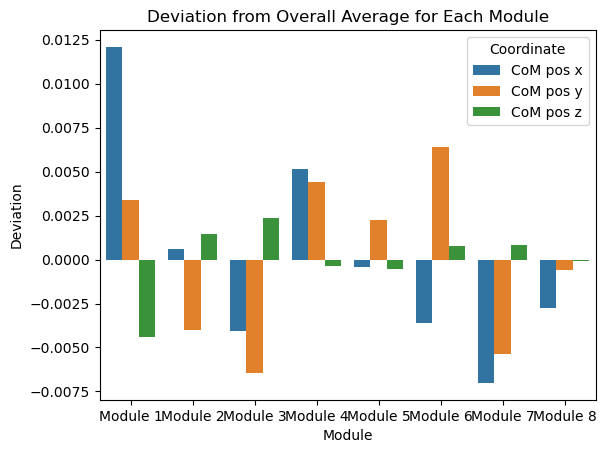

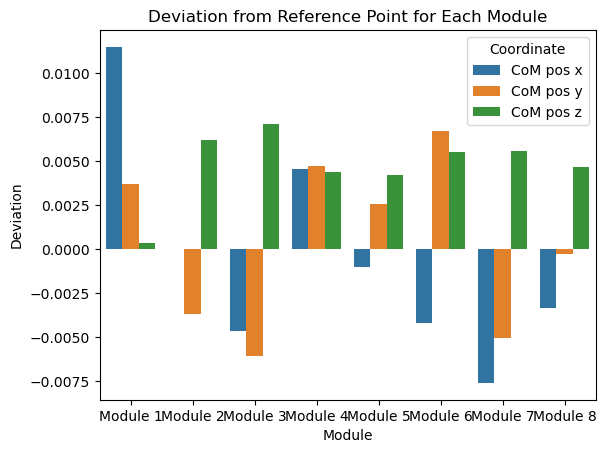

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the x, y, and z deviations from the overall average for each module.
sns.barplot(data=deviation_from_overall_avg.reset_index().melt(id_vars='index', var_name='Coordinate', value_name='Deviation'),
            x='index', y='Deviation', hue='Coordinate')
plt.title('Deviation from Overall Average for Each Module')
plt.xlabel('Module')
plt.ylabel('Deviation')
plt.show()

# Similar plot for deviation from a reference point
sns.barplot(data=deviation_from_reference.reset_index().melt(id_vars='index', var_name='Coordinate', value_name='Deviation'),
            x='index', y='Deviation', hue='Coordinate')
plt.title('Deviation from Reference Point for Each Module')
plt.xlabel('Module')
plt.ylabel('Deviation')
plt.show()


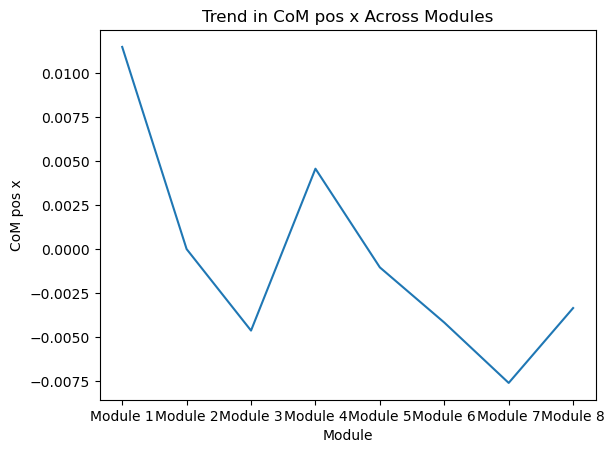

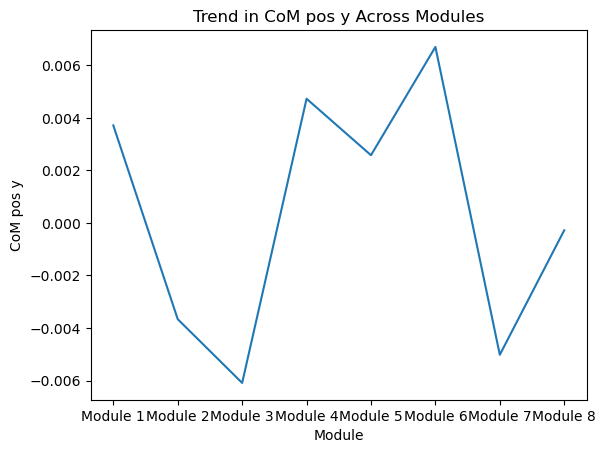

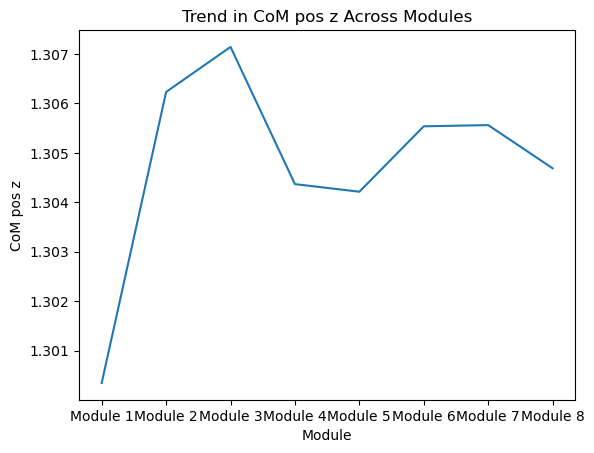

In [7]:
# Create line plots for each coordinate
for coordinate in ['CoM pos x', 'CoM pos y', 'CoM pos z']:
    sns.lineplot(data=df_averages.reset_index(), x='index', y=coordinate)
    plt.title(f'Trend in {coordinate} Across Modules')
    plt.xlabel('Module')
    plt.ylabel(coordinate)
    plt.show()


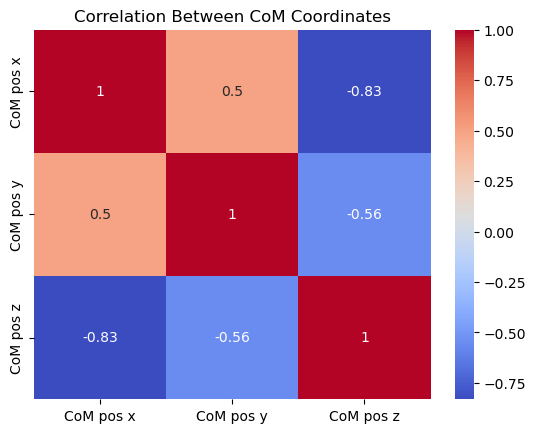

In [8]:
# Generate a heatmap
sns.heatmap(df_averages.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between CoM Coordinates')
plt.show()


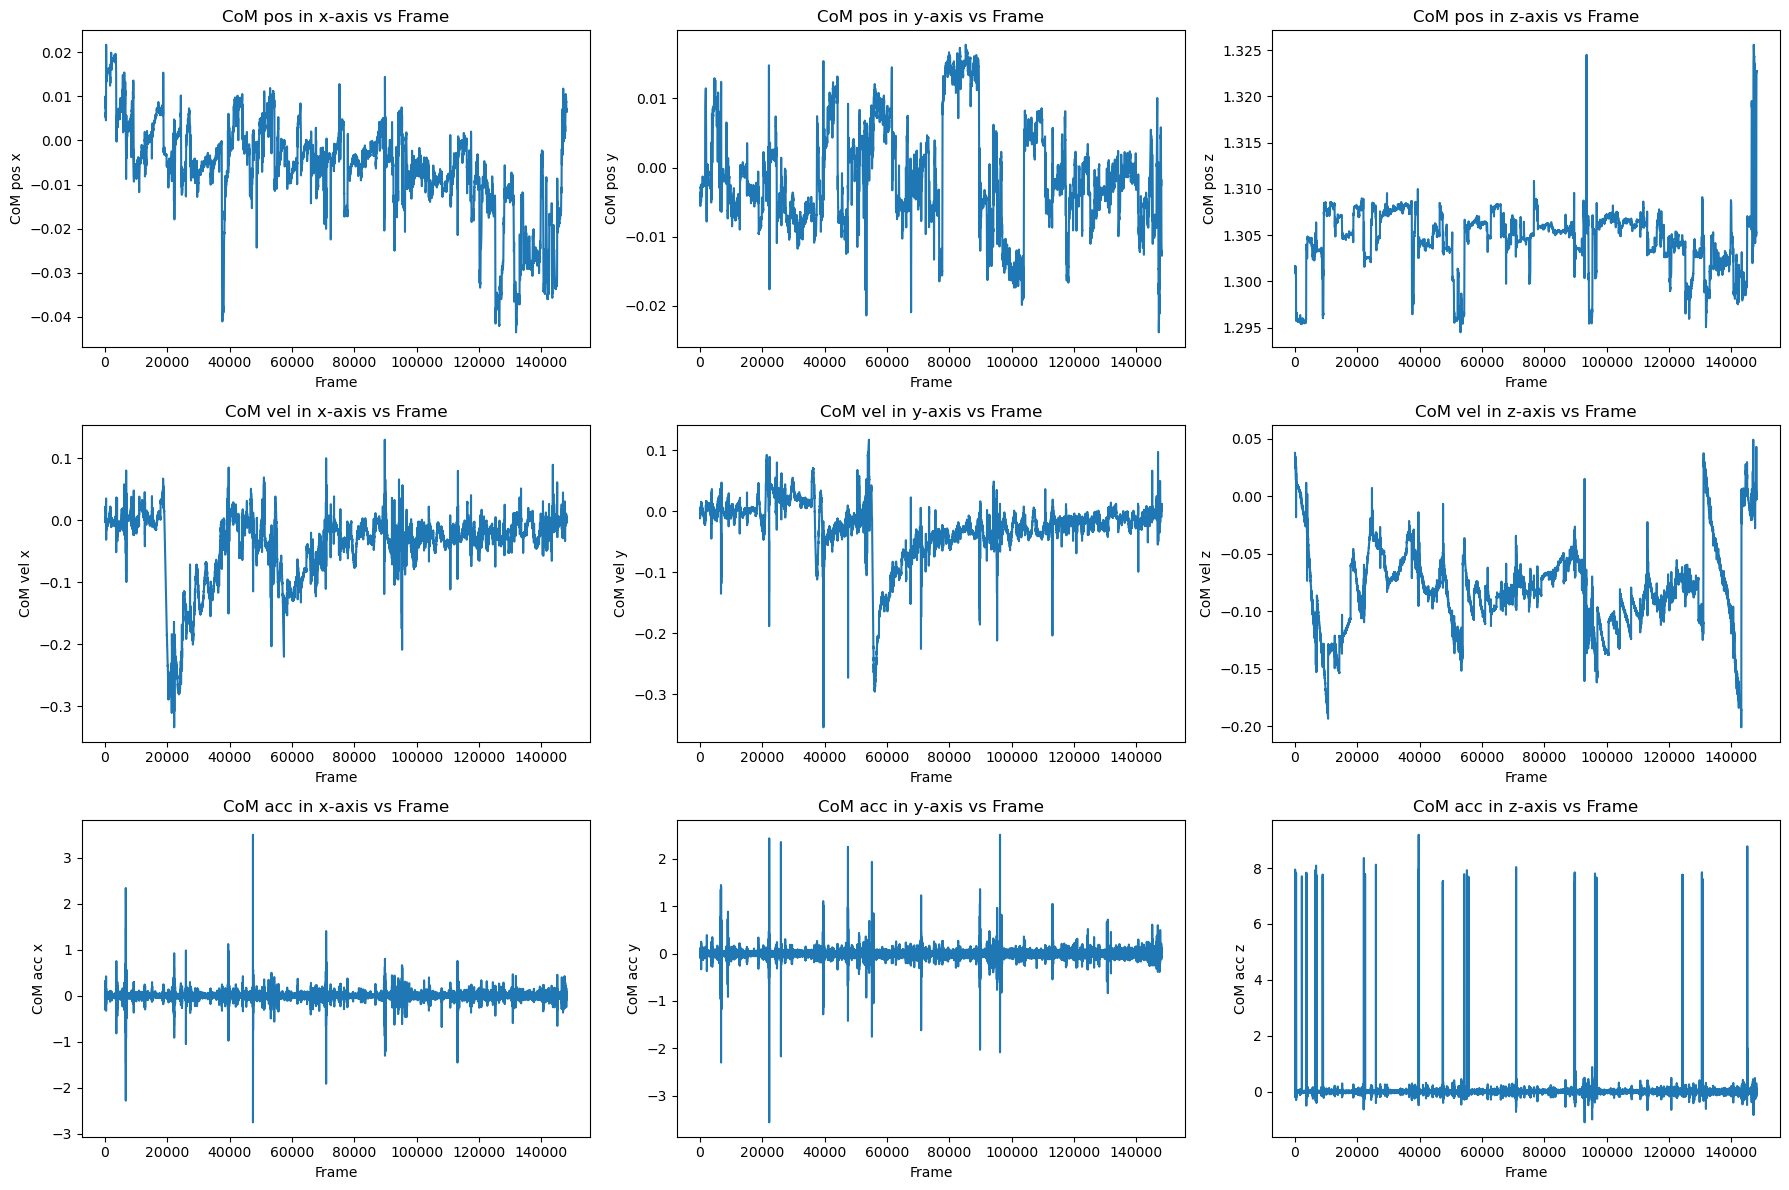

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the motion capture data
# df = pd.read_excel('your_file.xlsx', engine='openpyxl')

# Create subplots for x, y, z axis
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# List of metrics for each axis
metrics = ['CoM pos', 'CoM vel', 'CoM acc']
axes_x = ['x', 'y', 'z']

# Loop to generate plots
for i, metric in enumerate(metrics):
    for j, axis in enumerate(axes_x):
        ax = axes[3 * i + j]
        column_name = f"{metric} {axis}"
        
        ax.plot(df['Frame'], df[column_name])
        ax.set_title(f"{metric} in {axis}-axis vs Frame")
        ax.set_xlabel("Frame")
        ax.set_ylabel(f"{metric} {axis}")

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_excel('your_file.xlsx', engine='openpyxl')

# Define your thresholds for significant shifts for each axis
threshold_x = 0.002  # Replace with a value that makes sense for your data
threshold_y = 0.002  # Replace with a value that makes sense for your data
threshold_z = 0.002  # Replace with a value that makes sense for your data

# Calculate the absolute difference between consecutive positions
df_diff = df[['CoM pos x', 'CoM pos y', 'CoM pos z']].diff().abs()

# Flag the points where the difference exceeds the threshold
df_diff['Significant Shift x'] = df_diff['CoM pos x'] > threshold_x
df_diff['Significant Shift y'] = df_diff['CoM pos y'] > threshold_y
df_diff['Significant Shift z'] = df_diff['CoM pos z'] > threshold_z

# Count the number of significant shifts in each axis
count_shift_x = df_diff['Significant Shift x'].sum()
count_shift_y = df_diff['Significant Shift y'].sum()
count_shift_z = df_diff['Significant Shift z'].sum()

print(f"Number of significant shifts in x-axis: {count_shift_x}")
print(f"Number of significant shifts in y-axis: {count_shift_y}")
print(f"Number of significant shifts in z-axis: {count_shift_z}")

# If you want to add these flags back to your original DataFrame
df = pd.concat([df, df_diff[['Significant Shift x', 'Significant Shift y', 'Significant Shift z']]], axis=1)


Number of significant shifts in x-axis: 1
Number of significant shifts in y-axis: 4
Number of significant shifts in z-axis: 0


In [15]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_excel('your_file.xlsx', engine='openpyxl')

# Define your thresholds for significant velocity changes for each axis
high_velocity_threshold_x = 0.2  # Replace with a value that makes sense for your data
low_velocity_threshold_x = 0.05  # Replace with a value that makes sense for your data

high_velocity_threshold_y = 0.2  # Replace with a value that makes sense for your data
low_velocity_threshold_y = 0.05  # Replace with a value that makes sense for your data

high_velocity_threshold_z = 0.2  # Replace with a value that makes sense for your data
low_velocity_threshold_z = 0.05  # Replace with a value that makes sense for your data

# Flag the points where velocity exceeds the high or low thresholds
df['High Velocity x'] = df['CoM vel x'].abs() > high_velocity_threshold_x
df['Low Velocity x'] = df['CoM vel x'].abs() < low_velocity_threshold_x

df['High Velocity y'] = df['CoM vel y'].abs() > high_velocity_threshold_y
df['Low Velocity y'] = df['CoM vel y'].abs() < low_velocity_threshold_y

df['High Velocity z'] = df['CoM vel z'].abs() > high_velocity_threshold_z
df['Low Velocity z'] = df['CoM vel z'].abs() < low_velocity_threshold_z

# Count the number of high and low velocity instances for each axis
count_high_velocity_x = df['High Velocity x'].sum()
count_low_velocity_x = df['Low Velocity x'].sum()

count_high_velocity_y = df['High Velocity y'].sum()
count_low_velocity_y = df['Low Velocity y'].sum()

count_high_velocity_z = df['High Velocity z'].sum()
count_low_velocity_z = df['Low Velocity z'].sum()

print(f"Number of high velocity instances in x-axis: {count_high_velocity_x}")
print(f"Number of low velocity instances in x-axis: {count_low_velocity_x}")

print(f"Number of high velocity instances in y-axis: {count_high_velocity_y}")
print(f"Number of low velocity instances in y-axis: {count_low_velocity_y}")

print(f"Number of high velocity instances in z-axis: {count_high_velocity_z}")
print(f"Number of low velocity instances in z-axis: {count_low_velocity_z}")


Number of high velocity instances in x-axis: 4653
Number of low velocity instances in x-axis: 110671
Number of high velocity instances in y-axis: 1876
Number of low velocity instances in y-axis: 122372
Number of high velocity instances in z-axis: 3
Number of low velocity instances in z-axis: 23288


In [16]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_excel('your_file.xlsx', engine='openpyxl')

# Define your thresholds for significant acceleration peaks for each axis
acceleration_threshold_x = 0.1  # Replace with a value that makes sense for your data
acceleration_threshold_y = 0.1  # Replace with a value that makes sense for your data
acceleration_threshold_z = 0.1  # Replace with a value that makes sense for your data

# Flag the points where acceleration exceeds the threshold
df['Acceleration Peak x'] = df['CoM acc x'].abs() > acceleration_threshold_x
df['Acceleration Peak y'] = df['CoM acc y'].abs() > acceleration_threshold_y
df['Acceleration Peak z'] = df['CoM acc z'].abs() > acceleration_threshold_z

# Count the number of acceleration peaks in each axis
count_peak_x = df['Acceleration Peak x'].sum()
count_peak_y = df['Acceleration Peak y'].sum()
count_peak_z = df['Acceleration Peak z'].sum()

print(f"Number of acceleration peaks in x-axis: {count_peak_x}")
print(f"Number of acceleration peaks in y-axis: {count_peak_y}")
print(f"Number of acceleration peaks in z-axis: {count_peak_z}")


Number of acceleration peaks in x-axis: 4531
Number of acceleration peaks in y-axis: 4654
Number of acceleration peaks in z-axis: 3894


In [22]:
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_excel('your_file.xlsx', engine='openpyxl')

# Define your frame intervals for each module
frame_intervals = [
    (1500, 6300), 
    (8040, 20700), 
    (23640, 36480), 
    (40500, 45420), 
    (48720, 66600), 
    (72180, 86580), 
    (90960, 110640), 
    (114360, 117360)
]

# Create a new 'Module' column in the DataFrame
df['Module'] = None

# Label each row with the corresponding module number
for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
    df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    
    
# Save the updated DataFrame to a new Excel file
df.to_excel('mad2modules.xlsx', index=False, engine='openpyxl')



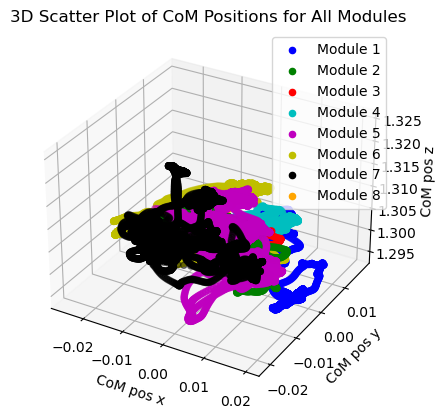

In [21]:
import matplotlib.pyplot as plt

# Set up a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
module_labels = [f'Module {i+1}' for i in range(8)]

# Loop through each module, plotting its points in the 3D space
for i, label in enumerate(module_labels):
    module_data = df[df['Module'] == label]
    ax.scatter(module_data['CoM pos x'], module_data['CoM pos y'], module_data['CoM pos z'], c=colors[i], label=label)

# Add axis labels and title
ax.set_xlabel('CoM pos x')
ax.set_ylabel('CoM pos y')
ax.set_zlabel('CoM pos z')
ax.set_title('3D Scatter Plot of CoM Positions for All Modules')

# Add a legend
ax.legend()

# Show the plot
plt.show()


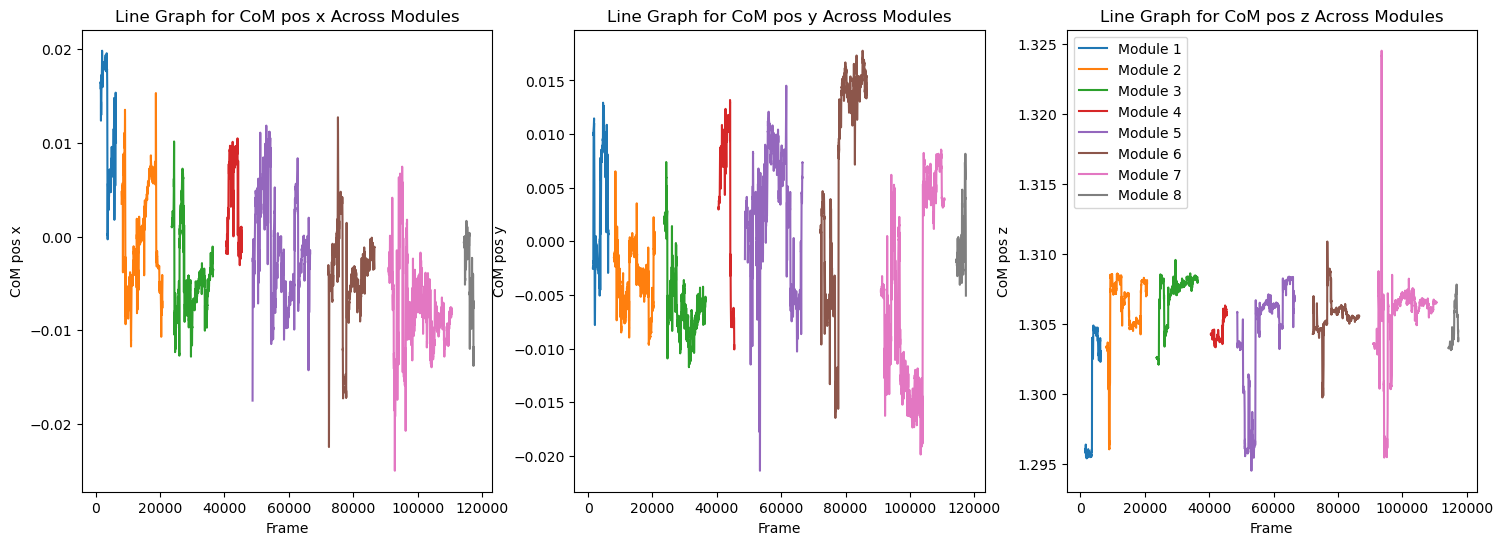

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('mad2modules.xlsx', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM pos x', 'CoM pos y', 'CoM pos z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_new[df_new['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


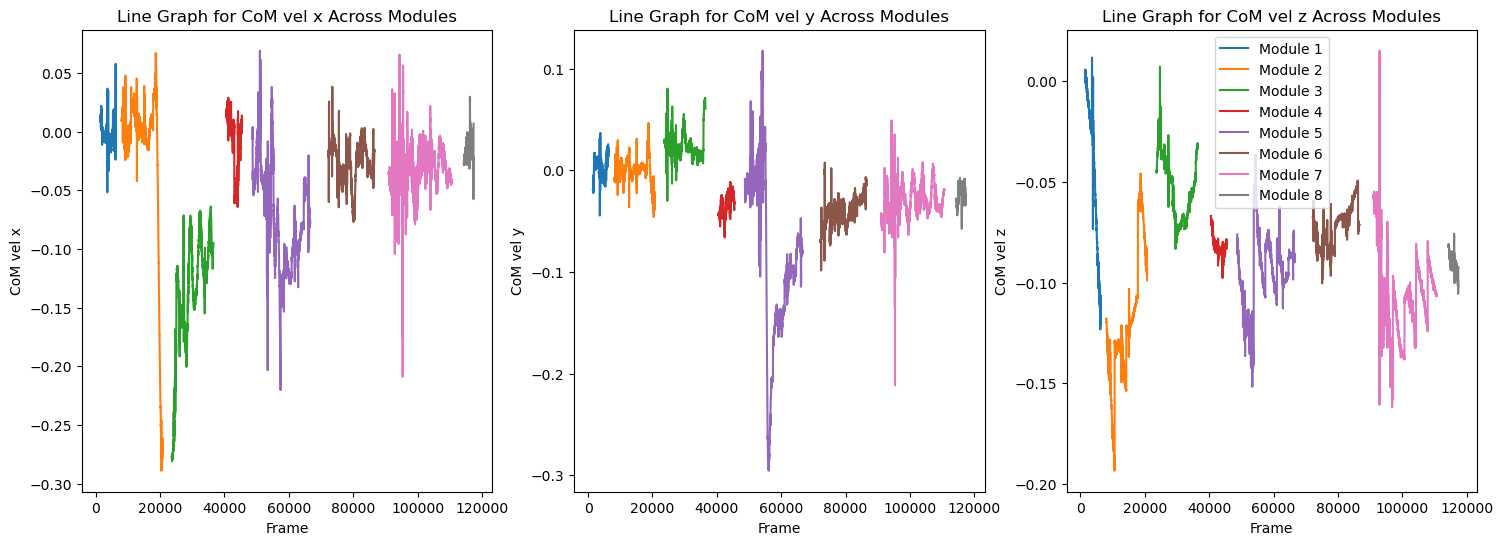

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('mad2modules.xlsx', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM vel x', 'CoM vel y', 'CoM vel z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_new[df_new['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


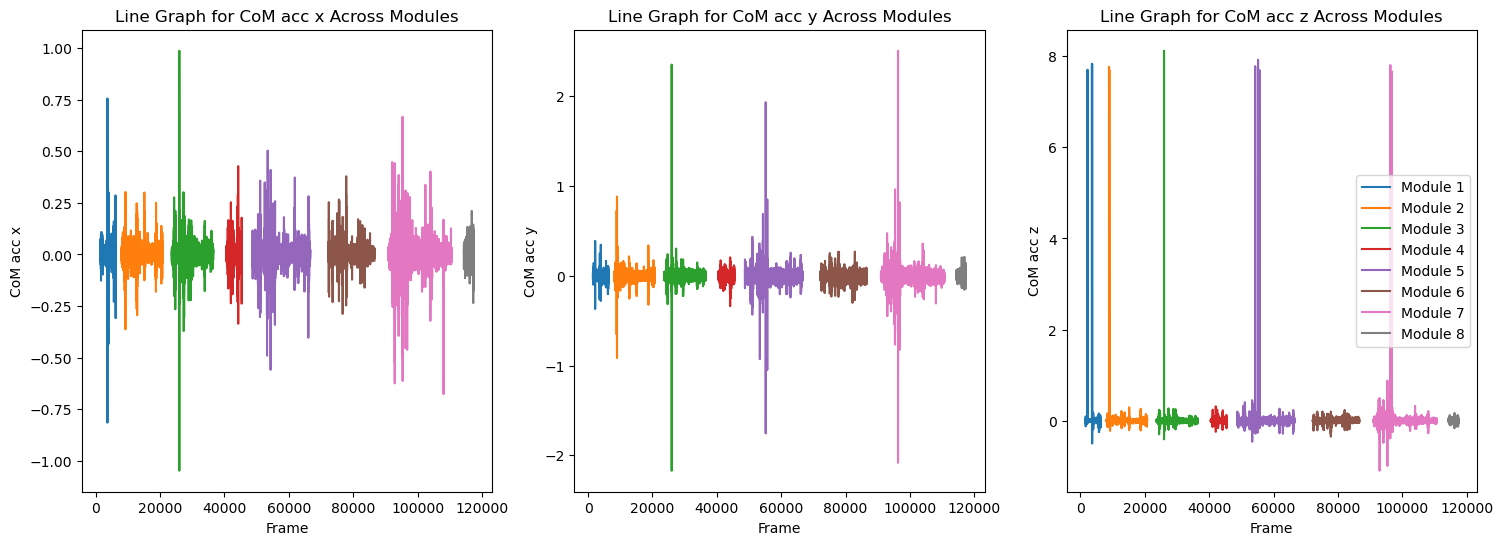

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('mad2modules.xlsx', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM acc x', 'CoM acc y', 'CoM acc z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_new[df_new['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


In [49]:
with pd.ExcelFile('Centerofmassmad2.xlsx') as xls:
    print(xls.sheet_names)

['Sheet1', 'position']


In [50]:
with pd.ExcelFile('mad2modules.xlsx') as xls:
    print(xls.sheet_names)

['Sheet1']


In [51]:
import pandas as pd

# Read the existing Excel file into a DataFrame (assuming the COM data is on the first sheet)
with pd.ExcelFile('mad2modules.xlsx') as xls:
    df_com = pd.read_excel(xls, 'Sheet1', engine='openpyxl')  # Assuming 'Sheet1' contains the COM data

# Read the new 'position' datasheet into a new DataFrame
df_position = pd.read_excel('Centerofmassmad2.xlsx', 'position', engine='openpyxl')  # Replace 'your_file.xlsx' and 'position' with actual names if different

# Frame intervals you've used before
frame_intervals = [
    (1500, 6300),
    (8040, 20700),
    (23640, 36480),
    (40500, 45420),
    (48720, 66600),
    (72180, 86580),
    (90960, 110640),
    (114360, 117360)
]

# Filter the 'position' DataFrame based on frame intervals
df_position['Module'] = None
for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
    df_position.loc[(df_position['Frame'] >= start_frame) & (df_position['Frame'] <= end_frame), 'Module'] = f'Module {i}'

# Append the new DataFrame to the existing Excel file as a new worksheet
with pd.ExcelWriter('mad2modules.xlsx', engine='openpyxl', mode='a') as writer:
    df_position.to_excel(writer, sheet_name='position', index=False)


In [52]:
with pd.ExcelFile('mad2modules.xlsx') as xls:
    print(xls.sheet_names)

['Sheet1', 'position']


In [168]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [    (1500, 6300),
    (8040, 20700),
    (23640, 36480),
    (40500, 45420),
    (48720, 66600),
    (72180, 86580),
    (90960, 110640),
    (114360, 117360)
]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('mad2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('mad2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('mad2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


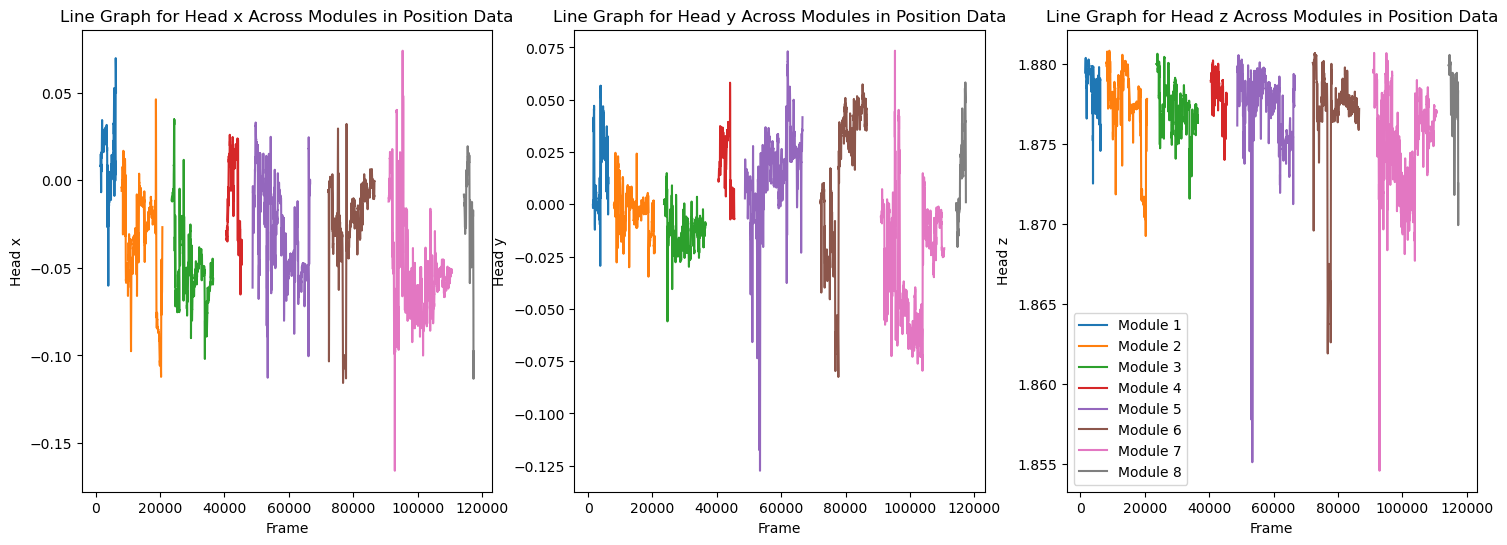

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Head x', 'Head y', 'Head z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


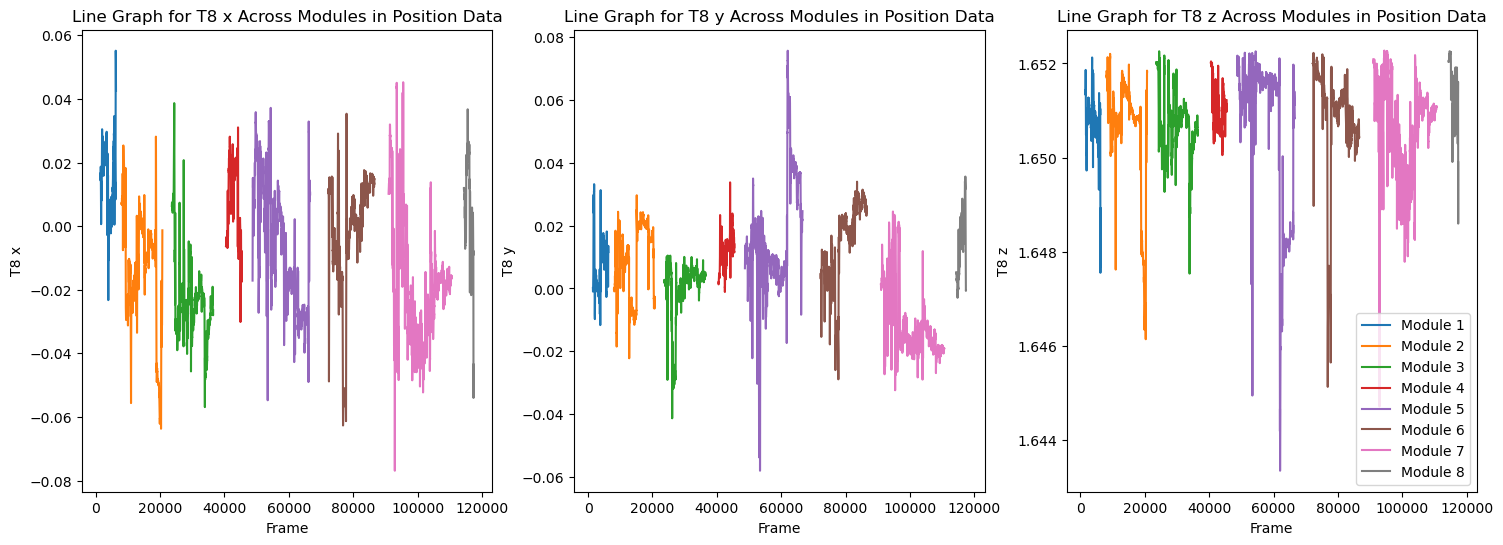

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['T8 x', 'T8 y', 'T8 z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


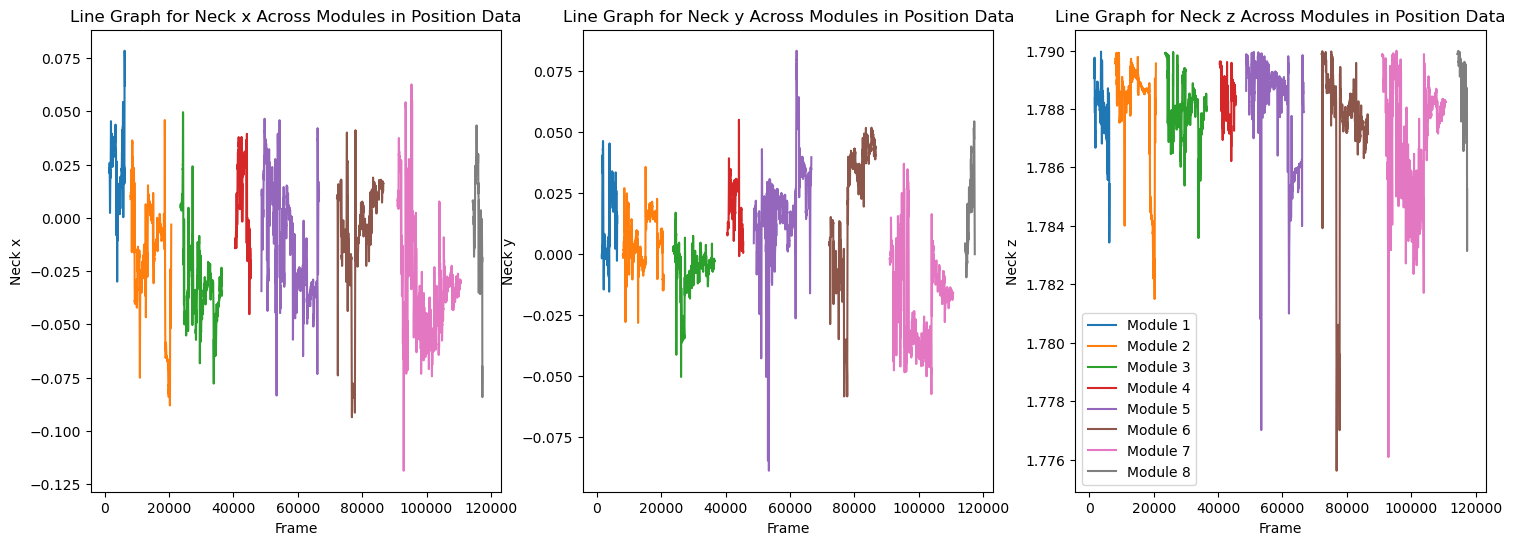

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Neck x', 'Neck y', 'Neck z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data['Frame'], module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Frame')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.show()


In [97]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfmad2 = pd.read_excel('mad2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfmad2.groupby('Module').std()[['Neck x', 'Neck y', 'Neck z']]

print(std_devs)


            Neck x    Neck y    Neck z
Module                                
Module 1  0.015891  0.014304  0.000937
Module 2  0.025532  0.009559  0.001781
Module 3  0.017447  0.009060  0.000904
Module 4  0.019261  0.009461  0.000732
Module 5  0.023474  0.017540  0.001699
Module 6  0.025172  0.027274  0.002436
Module 7  0.024071  0.017692  0.001836
Module 8  0.020100  0.015834  0.000969


In [99]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfmad2 = pd.read_excel('mad2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfmad2.groupby('Module').std()[['Head x', 'Head y', 'Head z']]

print(std_devs)


            Head x    Head y    Head z
Module                                
Module 1  0.017885  0.016587  0.001219
Module 2  0.027971  0.009074  0.002560
Module 3  0.019762  0.007784  0.001397
Module 4  0.023228  0.014008  0.001069
Module 5  0.024878  0.019859  0.002205
Module 6  0.026833  0.034435  0.003265
Module 7  0.025864  0.025774  0.002730
Module 8  0.020574  0.019153  0.001656


In [100]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfmad2 = pd.read_excel('mad2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfmad2.groupby('Module').std()[['T8 x', 'T8 y', 'T8 z']]

print(std_devs)


              T8 x      T8 y      T8 z
Module                                
Module 1  0.011765  0.008782  0.000604
Module 2  0.018465  0.011125  0.001261
Module 3  0.012733  0.009500  0.000653
Module 4  0.012347  0.005479  0.000453
Module 5  0.018381  0.017458  0.001671
Module 6  0.018372  0.012886  0.001177
Module 7  0.018173  0.010808  0.000928
Module 8  0.014498  0.009813  0.000622


In [58]:
import pandas as pd

# Read the Excel file
dfmad1 = pd.read_excel('Mad1.xlsx', 'com', engine='openpyxl')

# Show the first few rows to understand what the data looks like
print("First few rows of the dataframe:")
print(dfmad1.head())

# Describe the data to get statistical information
print("Statistical description of the dataframe:")
print(dfmad1.describe())

# If you want to describe a specific column, you can do it like this:
print("Statistical description of the 'CoM pos x' column:")
print(dfmad1['CoM pos x'].describe())


First few rows of the dataframe:
   Frame  CoM pos x  CoM pos y  CoM pos z  CoM vel x  CoM vel y  CoM vel z  \
0      0  -0.002719   0.000555   1.296520  -0.014567  -0.006126   0.046969   
1      1  -0.002732   0.000548   1.296537  -0.014763  -0.006160   0.046938   
2      2  -0.002745   0.000540   1.296553  -0.014844  -0.006070   0.046908   
3      3  -0.002752   0.000530   1.296566  -0.014665  -0.006164   0.046906   
4      4  -0.002749   0.000519   1.296570  -0.014608  -0.006361   0.046979   

   CoM acc x  CoM acc y  CoM acc z  
0   0.000894  -0.005642  -0.006354  
1  -0.001733  -0.000076  -0.001815  
2   0.003096  -0.009087  -0.004499  
3  -0.019316   0.017787  -0.003973  
4  -0.006208   0.013004   0.008790  
Statistical description of the dataframe:
              Frame     CoM pos x     CoM pos y     CoM pos z     CoM vel x  \
count  79912.000000  79912.000000  79912.000000  79912.000000  79912.000000   
mean   39955.500000      0.006428     -0.000520      1.301841     -0.007602 

In [59]:
# Define the start time in seconds (13 hours * 3600 + 30 minutes * 60 + 40 seconds)
start_time_seconds = 14 * 3600 + 13 * 60 + 15

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("14:13:38", "14:15:04"),
    ("14:16:08", "14:17:14"),
    ("14:20:16", "14:22:17"),
    ("14:22:58", "14:24:29"),
    ("14:25:05", "14:27:22"),
    ("14:28:41", "14:31:09"),
    ("14:31:54", "14:34:30")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = (start_seconds - start_time_seconds) * frame_rate
    end_frame = (end_seconds - start_time_seconds) * frame_rate

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(1380, 6540), (10380, 14340), (25260, 32520), (34980, 40440), (42600, 50820), (55560, 64440), (67140, 76500)]


In [63]:
import pandas as pd

# Assuming dfmad1 is already loaded into memory

# Define your frame intervals for each module
frame_intervals = [
    (1380, 6540), 
    (10380, 14340), 
    (25260, 32520), 
    (34980, 40440), 
    (42600, 50820), 
    (55560, 64440), 
    (67140, 76500)
]

# Create a new 'Module' column in the DataFrame
dfmad1['Module'] = None

# Segment the data based on the frame intervals and label them
for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
    dfmad1.loc[(dfmad1['Frame'] >= start_frame) & (dfmad1['Frame'] <= end_frame), 'Module'] = f'Module {i}'

# Filter out the rows that are not within any module
dfmad1_filtered = dfmad1.dropna(subset=['Module'])

# Save the filtered DataFrame to the mad1modules.xlsx file in a single sheet
dfmad1_filtered.to_excel('mad1modules.xlsx', index=False, engine='openpyxl')


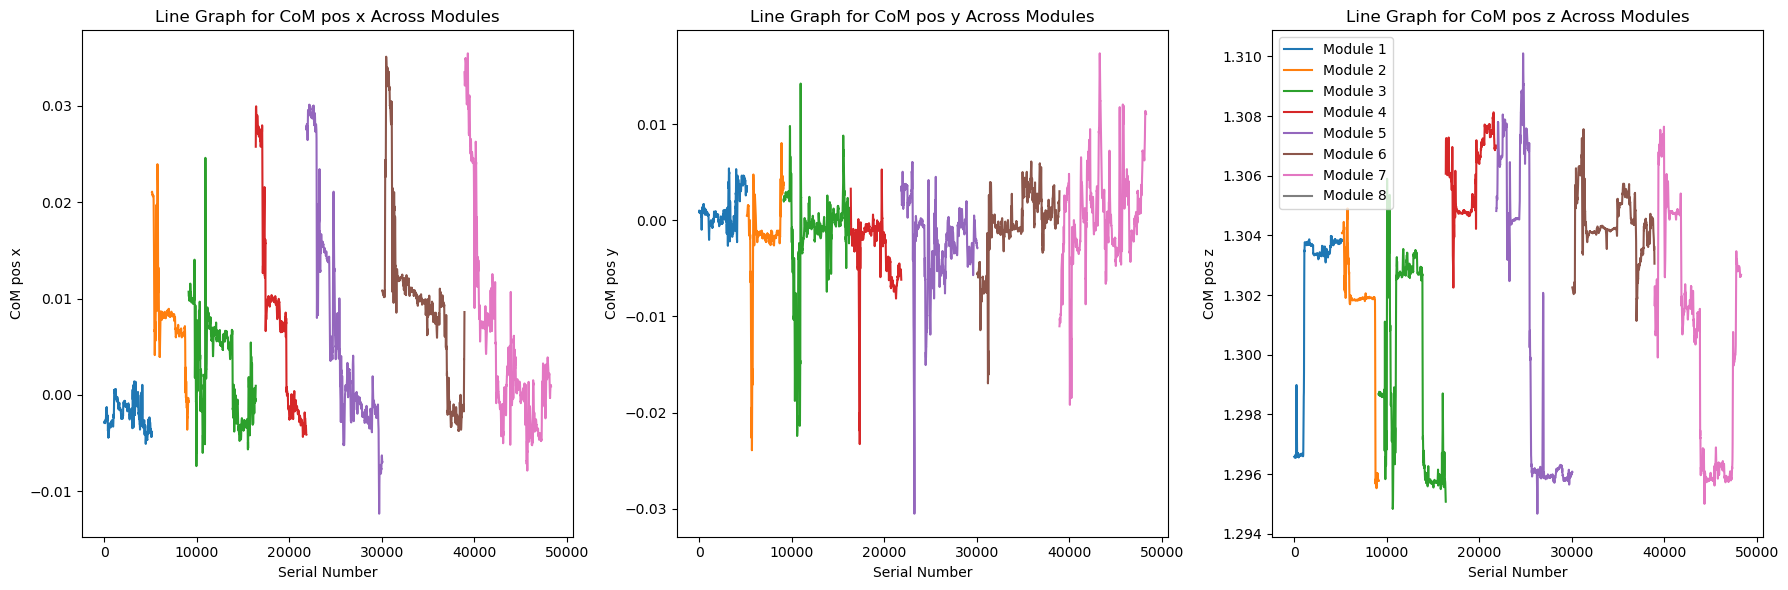

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('mad1modules.xlsx', engine='openpyxl')

# Reset the index for continuous serial numbers
df_new.reset_index(drop=True, inplace=True)

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM pos x', 'CoM pos y', 'CoM pos z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_new[df_new['Module'] == f'Module {i}']
        
        # Using module_data.index for serial numbers
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # This ensures that the subplots don't overlap
plt.show()


In [66]:
import pandas as pd

# Read the Excel file
dfmad1p = pd.read_excel('Mad1.xlsx', 'position', engine='openpyxl')

# Define your frame intervals for each module
frame_intervals = [
    (1380, 6540), 
    (10380, 14340), 
    (25260, 32520), 
    (34980, 40440), 
    (42600, 50820), 
    (55560, 64440), 
    (67140, 76500)
]

# Create a new 'Module' column in the DataFrame
dfmad1p['Module'] = None

# Segment the data based on the frame intervals and label them
for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
    dfmad1p.loc[(dfmad1p['Frame'] >= start_frame) & (dfmad1p['Frame'] <= end_frame), 'Module'] = f'Module {i}'

# Filter out the rows that are not within any module
dfmad1_filtered = dfmad1p.dropna(subset=['Module'])

# Append the filtered DataFrame to the existing mad1modules.xlsx file in a new sheet named 'position_filtered'
with pd.ExcelWriter('mad1modules.xlsx', engine='openpyxl', mode='a') as writer:
    dfmad1_filtered.to_excel(writer, sheet_name='position', index=False)


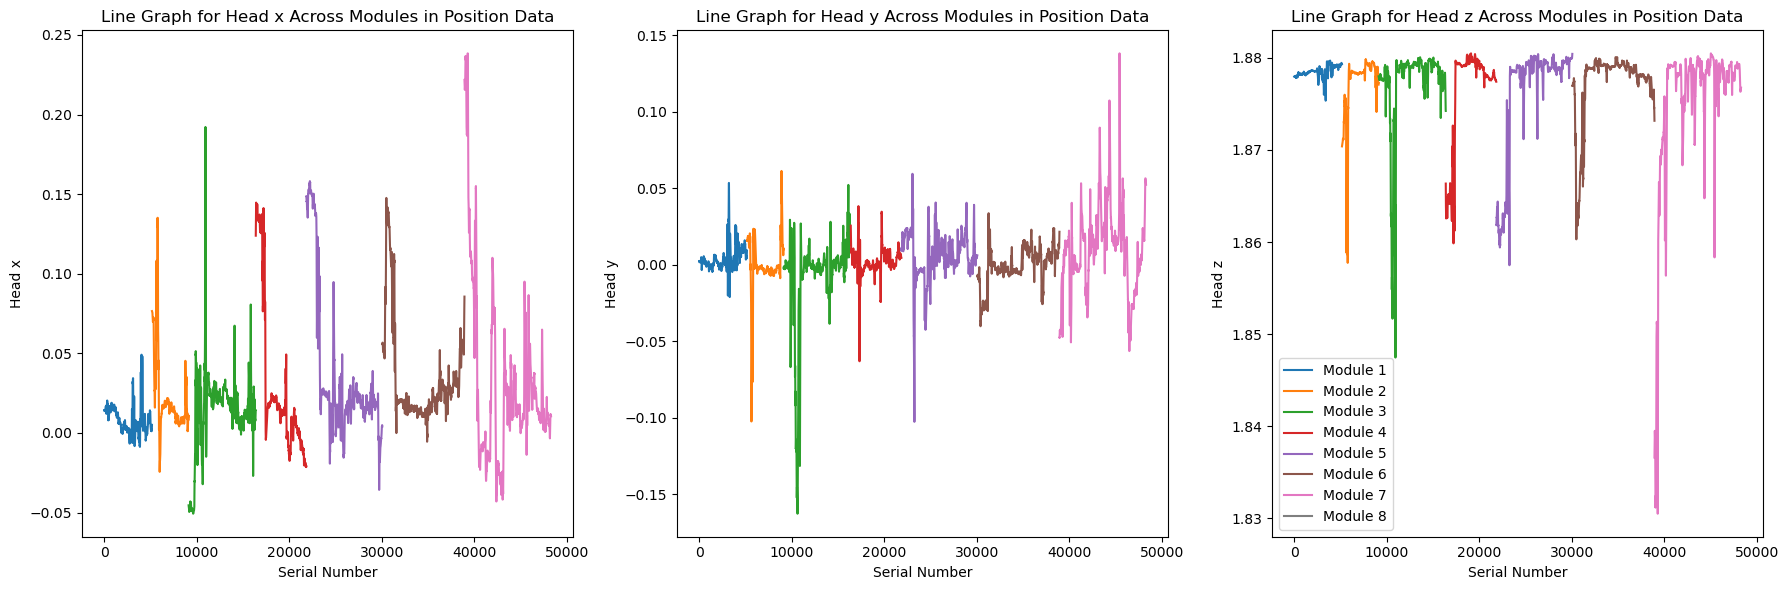

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad1modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Head x', 'Head y', 'Head z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


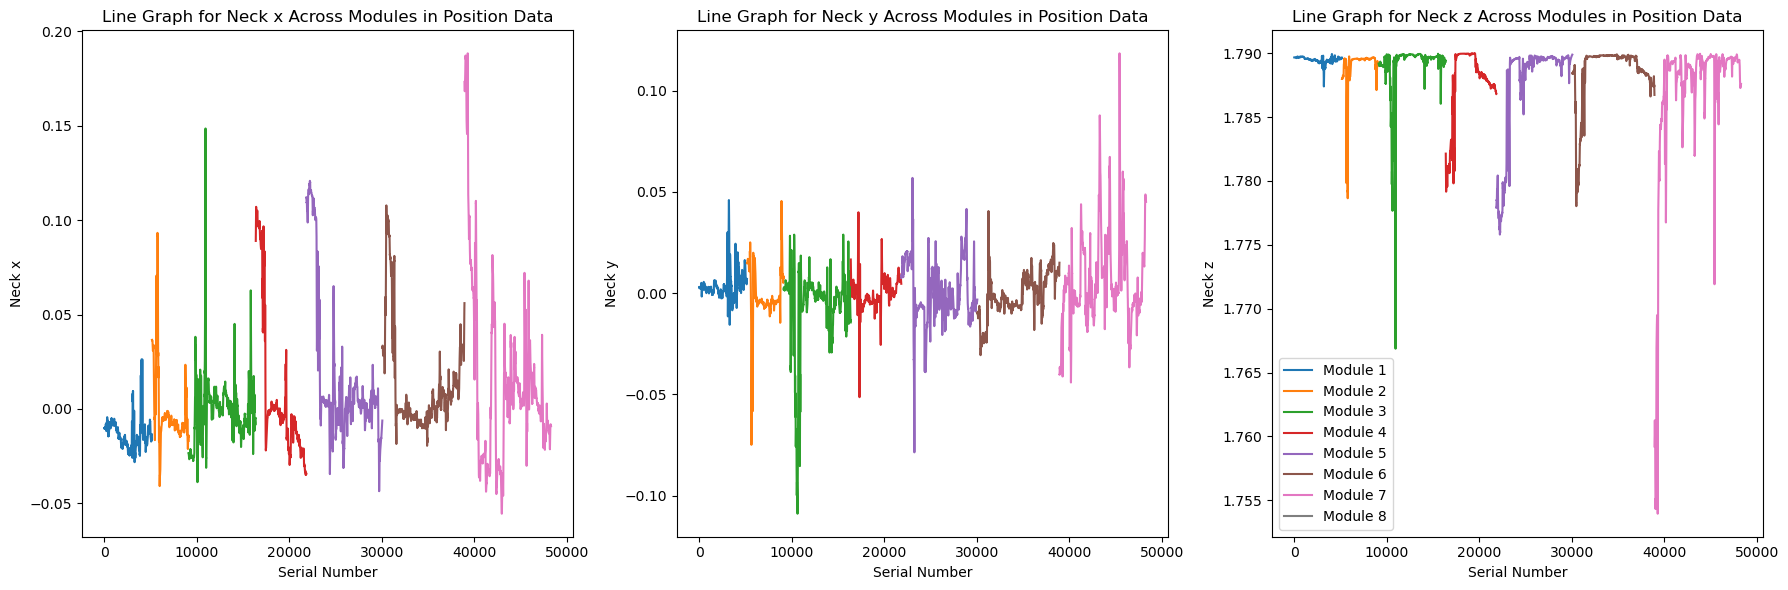

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad1modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Neck x', 'Neck y', 'Neck z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


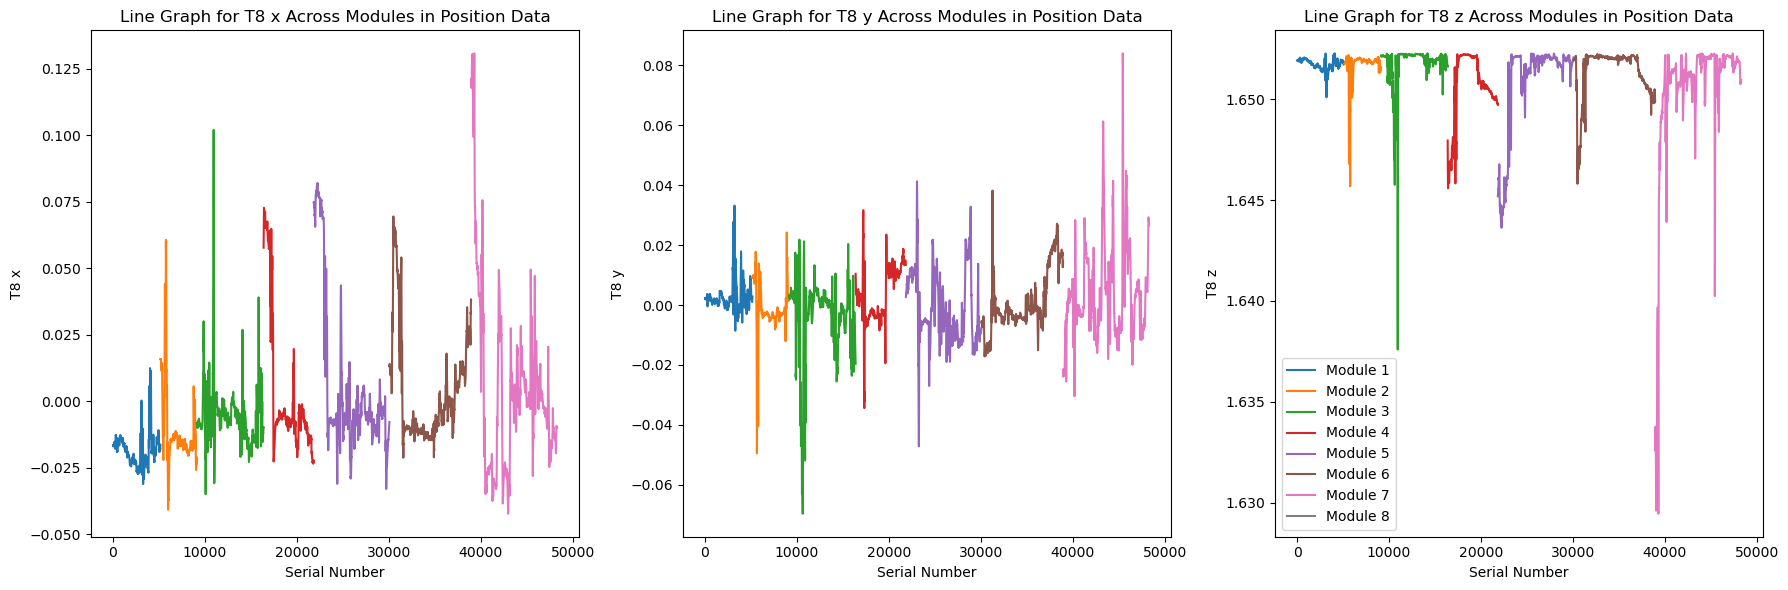

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('mad1modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['T8 x', 'T8 y', 'T8 z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


In [72]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 14 * 3600 + 44 * 60 + 55

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("14:45:08", "14:46:29"),
    ("14:47:09", "14:50:40"),
    ("14:51:15", "14:54:48"),
    ("14:56:02", "14:57:24"),
    ("14:58:14", "15:03:12"),
    ("15:04:16", "15:08:17"),
    ("15:08:54", "15:14:20"),
    ("15:14:55", "15:15:43")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(780, 5640), (8040, 20700), (22800, 35580), (40020, 44940), (47940, 65820), (69660, 84120), (86340, 105900), (108000, 110880)]


In [76]:
import pandas as pd

# Read the Excel file
dfpart1_2 = pd.read_excel('participant1_2.xlsx', 'com', engine='openpyxl')

# Show the first few rows to understand what the data looks like
print("First few rows of the dataframe:")
print(dfmad1.head())

# Describe the data to get statistical information
print("Statistical description of the dataframe:")
print(dfmad1.describe())

# If you want to describe a specific column, you can do it like this:
print("Statistical description of the 'CoM pos x' column:")
print(dfmad1['CoM pos x'].describe())


First few rows of the dataframe:
   Frame  CoM pos x  CoM pos y  CoM pos z  CoM vel x  CoM vel y  CoM vel z  \
0      0  -0.008795   0.001536   1.300122   0.015992  -0.020284   0.021188   
1      1  -0.008797   0.001516   1.300149   0.015850  -0.020288   0.021084   
2      2  -0.008800   0.001495   1.300176   0.016049  -0.020532   0.020980   
3      3  -0.008803   0.001480   1.300196   0.016605  -0.020832   0.020866   
4      4  -0.008810   0.001473   1.300205   0.016990  -0.020959   0.020685   

   CoM acc x  CoM acc y  CoM acc z Module  
0  -0.016086  -0.004436   0.003265   None  
1  -0.025303   0.007274   0.002037   None  
2   0.002204  -0.043248  -0.002948   None  
3  -0.030606  -0.007161   0.005142   None  
4   0.007221   0.002238   0.018938   None  
Statistical description of the dataframe:
               Frame      CoM pos x      CoM pos y      CoM pos z  \
count  114124.000000  114124.000000  114124.000000  114124.000000   
mean    57061.500000      -0.028340      -0.001045    

In [169]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [    (780, 5640), (8040, 20700),
                   (22800, 35580), (40020, 44940), 
                   (47940, 65820), (69660, 84120), 
                   (86340, 105900), (108000, 110880)
]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('participant1_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('participant1_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part1_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


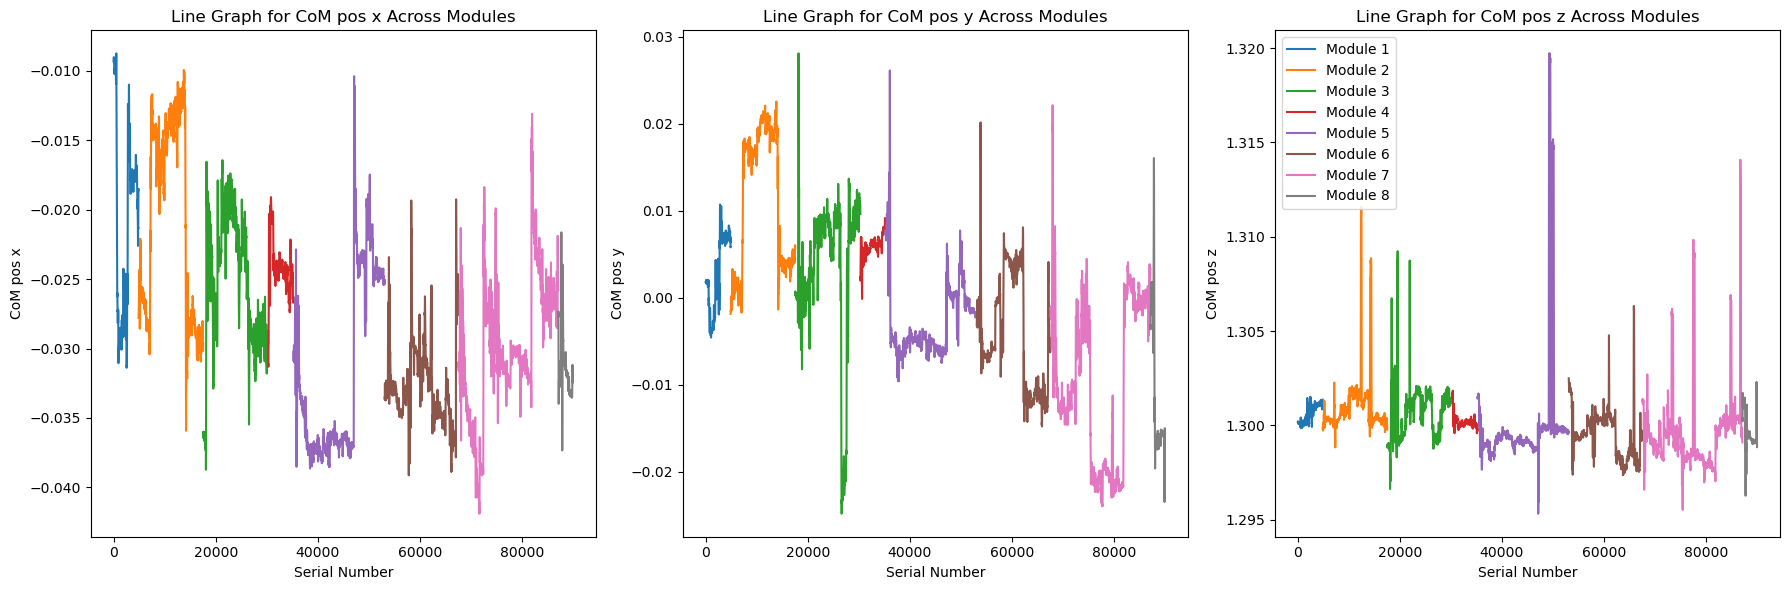

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('part1_2modules.xlsx', engine='openpyxl')

# Reset the index for continuous serial numbers
df_new.reset_index(drop=True, inplace=True)

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM pos x', 'CoM pos y', 'CoM pos z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_new[df_new['Module'] == f'Module {i}']
        
        # Using module_data.index for serial numbers
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # This ensures that the subplots don't overlap
plt.show()


In [90]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [
    (780, 5640), (8040, 20700),
    (22800, 35580), (40020, 44940),
    (47940, 65820), (69660, 84120),
    (86340, 105900), (108000, 110880)
]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('participant1_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('participant1_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part1_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


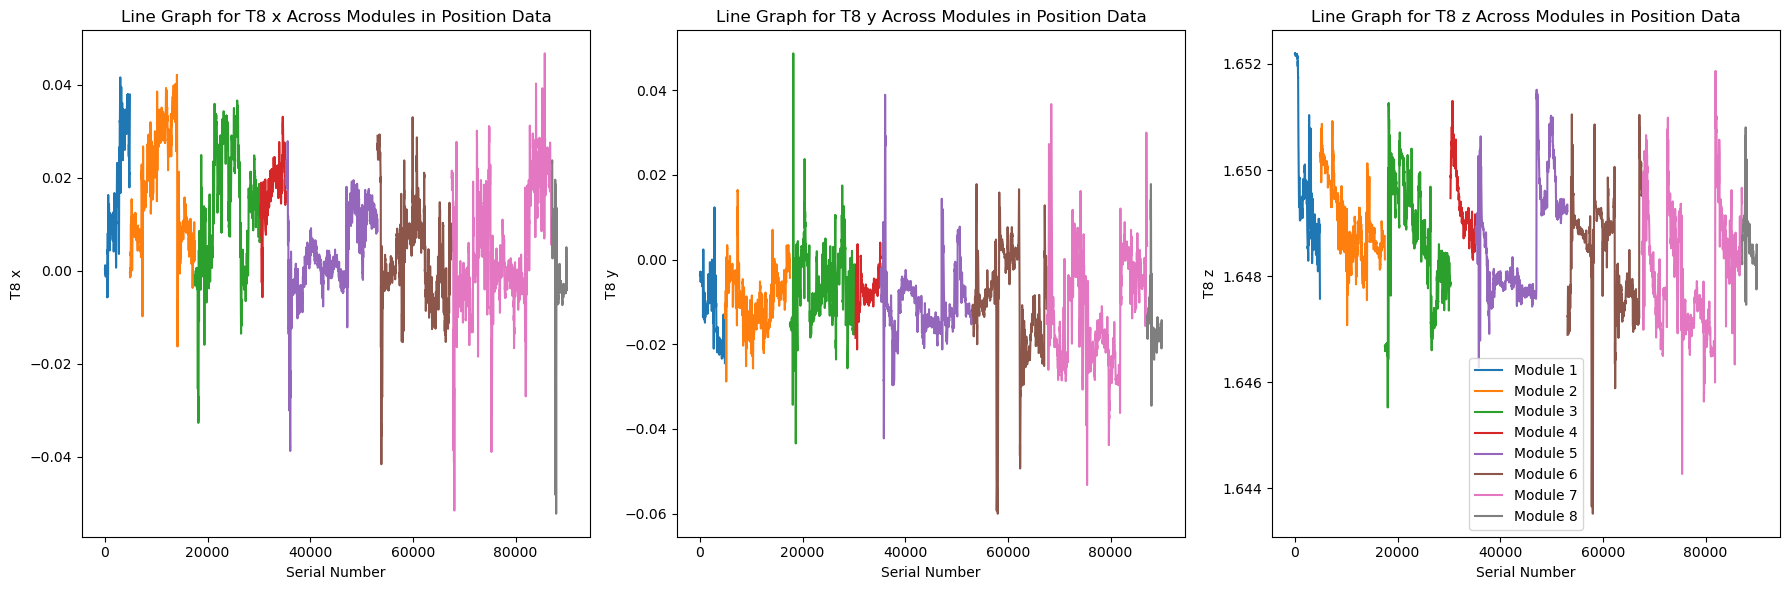

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('part1_2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['T8 x', 'T8 y', 'T8 z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


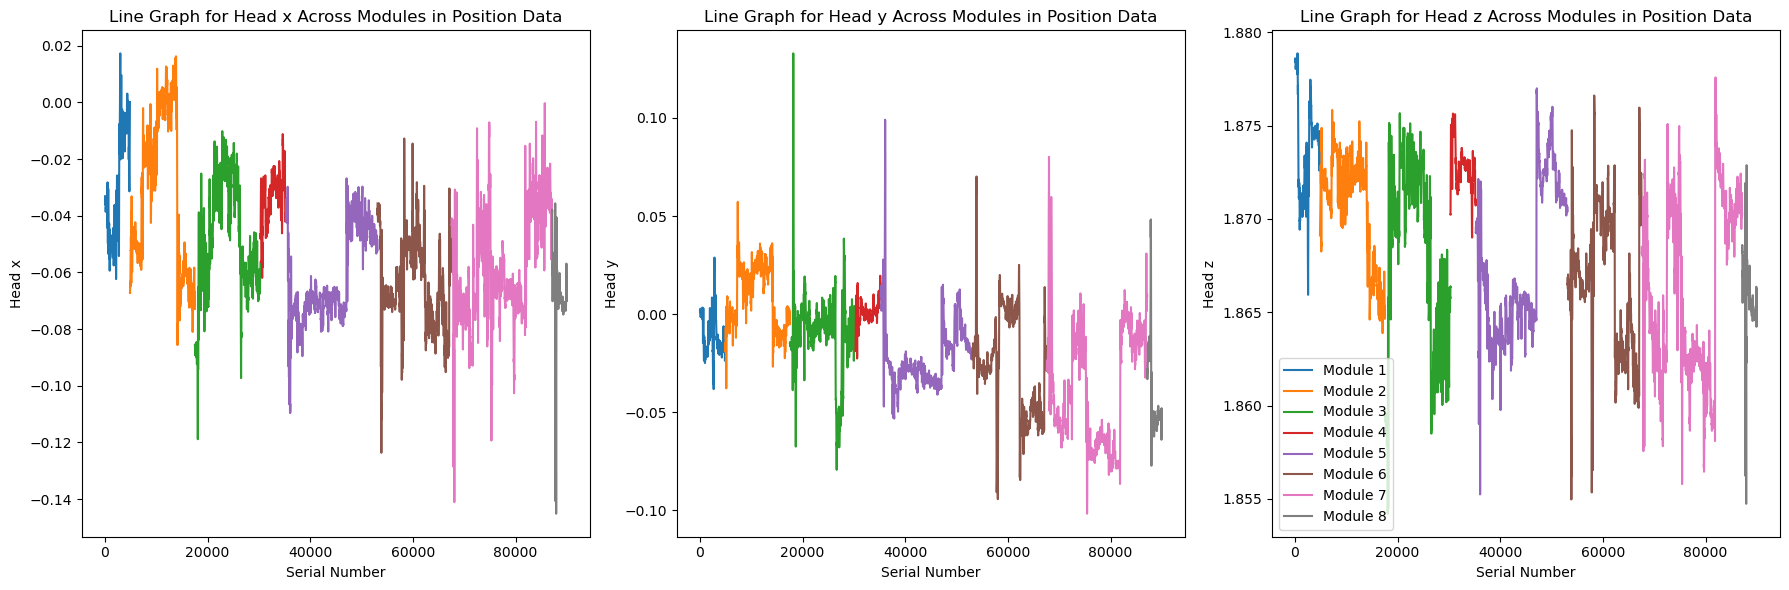

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('part1_2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Head x', 'Head y', 'Head z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


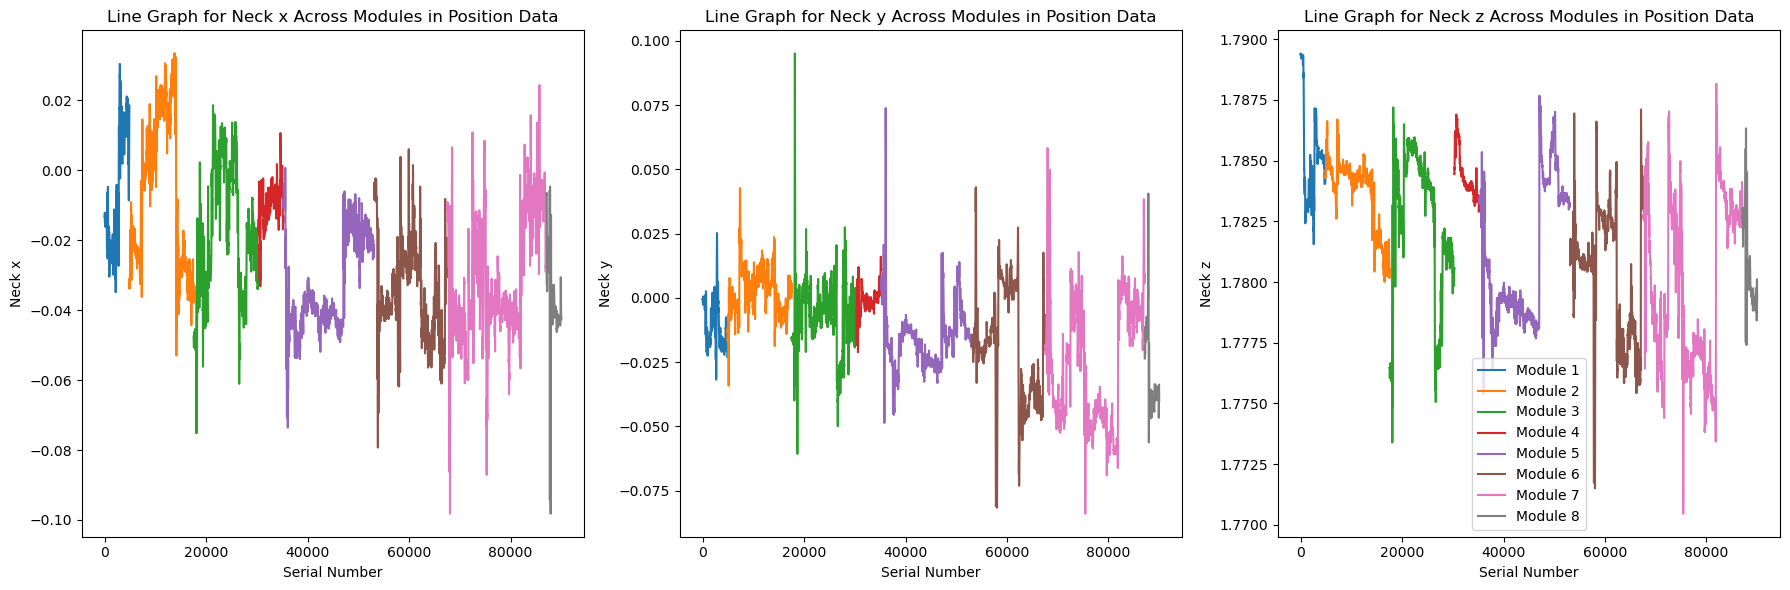

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('part1_2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Neck x', 'Neck y', 'Neck z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


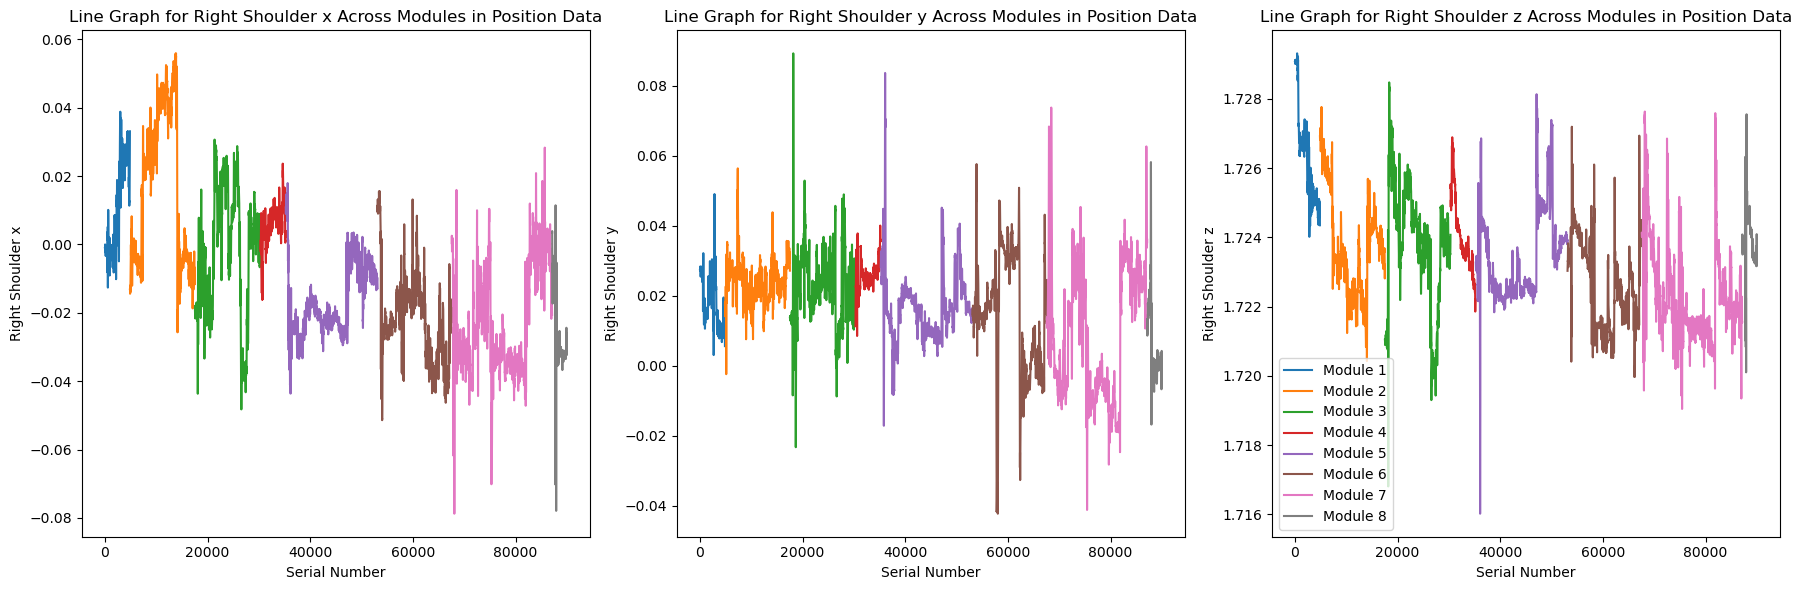

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('part1_2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Right Shoulder x', 'Right Shoulder y', 'Right Shoulder z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


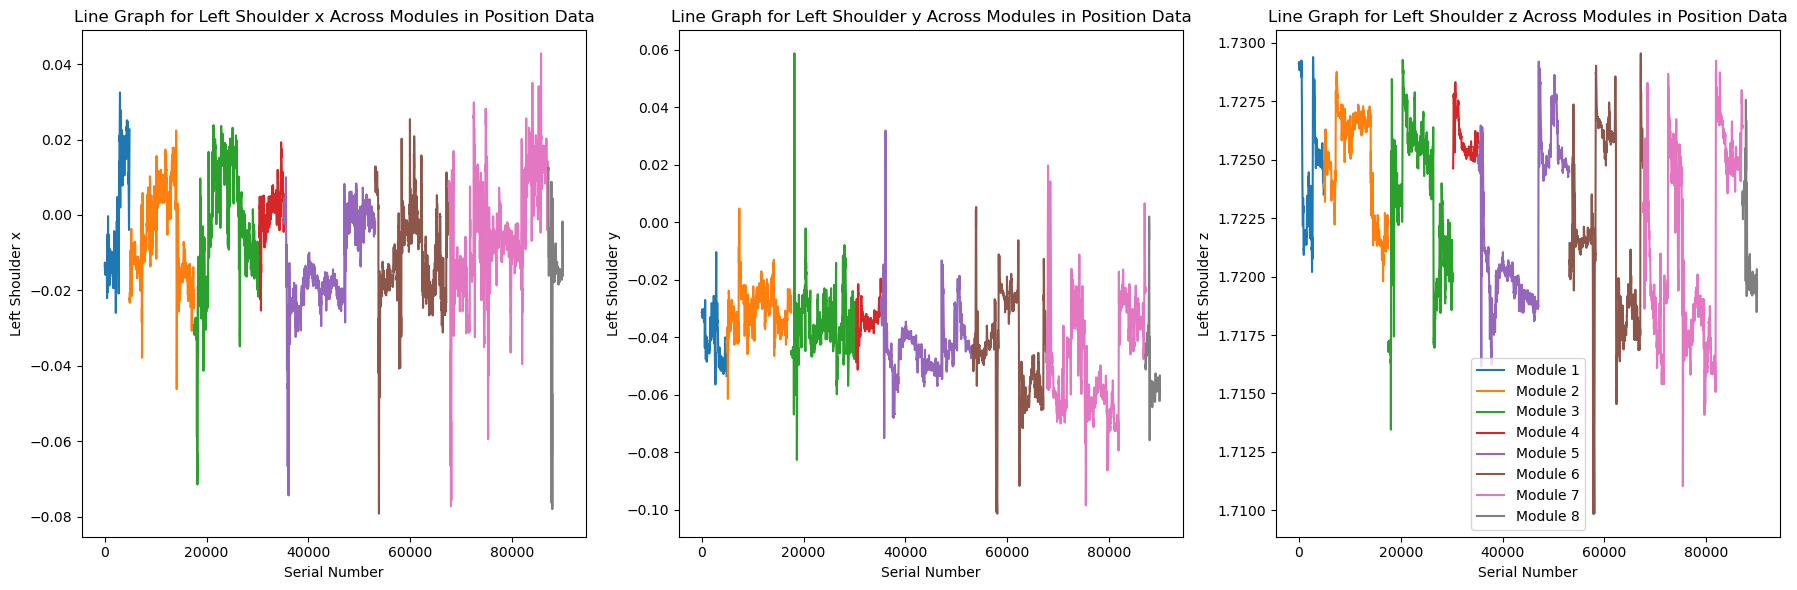

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the position data from the new sheet 'Position' into a DataFrame
df_position = pd.read_excel('part1_2modules.xlsx', sheet_name='position', engine='openpyxl')

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['Left Shoulder x', 'Left Shoulder y', 'Left Shoulder z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    for i in range(1, 9):  # Assuming modules are labeled from 1 to 8
        module_data = df_position[df_position['Module'] == f'Module {i}']
        ax.plot(module_data.index, module_data[var], label=f'Module {i}')
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var} Across Modules in Position Data')

# Add a legend to the last subplot
axs[-1].legend()

# Show the plots
plt.tight_layout()  # to make sure the subplots fit well within the figure
plt.show()


In [91]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfpart1_2 = pd.read_excel('part1_2modules.xlsx', 'com', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfpart1_2.groupby('Module').std()[['CoM pos x', 'CoM pos y', 'CoM pos z']]

print(std_devs)


          CoM pos x  CoM pos y  CoM pos z
Module                                   
Module 1   0.006695   0.004309   0.000467
Module 2   0.007165   0.007996   0.001658
Module 3   0.004805   0.008571   0.001507
Module 4   0.001832   0.001209   0.000279
Module 5   0.006586   0.004268   0.003341
Module 6   0.002907   0.006702   0.001233
Module 7   0.004760   0.009156   0.002252
Module 8   0.002102   0.008123   0.000885


In [92]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfpart1_2 = pd.read_excel('part1_2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfpart1_2.groupby('Module').std()[['T8 x', 'T8 y', 'T8 z']]

print(std_devs)


              T8 x      T8 y      T8 z
Module                                
Module 1  0.012220  0.007022  0.001125
Module 2  0.011416  0.006335  0.000700
Module 3  0.012603  0.008681  0.001083
Module 4  0.005635  0.003584  0.000659
Module 5  0.008262  0.007043  0.001002
Module 6  0.009892  0.012272  0.001038
Module 7  0.012384  0.011782  0.001082
Module 8  0.010018  0.006168  0.000496


In [95]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfpart1_2 = pd.read_excel('part1_2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfpart1_2.groupby('Module').std()[['Head x', 'Head y', 'Head z']]

print(std_devs)


            Head x    Head y    Head z
Module                                
Module 1  0.019342  0.010413  0.002593
Module 2  0.027378  0.015934  0.002819
Module 3  0.019541  0.020712  0.004925
Module 4  0.007879  0.005731  0.001110
Module 5  0.016029  0.015856  0.004013
Module 6  0.015282  0.026050  0.003731
Module 7  0.019168  0.028819  0.004654
Module 8  0.013552  0.021278  0.002001


In [96]:
import pandas as pd

# Assuming df is your DataFrame with the filtered data
dfpart1_2 = pd.read_excel('part1_2modules.xlsx', 'position', engine='openpyxl')

# Compute standard deviation for each module
std_devs = dfpart1_2.groupby('Module').std()[['Neck x', 'Neck y', 'Neck z']]

print(std_devs)


            Neck x    Neck y    Neck z
Module                                
Module 1  0.016368  0.008705  0.001933
Module 2  0.021478  0.008575  0.001387
Module 3  0.018239  0.014169  0.002935
Module 4  0.005915  0.004993  0.000952
Module 5  0.013497  0.012159  0.002791
Module 6  0.013439  0.021890  0.002639
Module 7  0.016803  0.023394  0.003382
Module 8  0.012086  0.016016  0.001649


In [158]:
import pandas as pd

# Load the Hololens data
df_holo = pd.read_excel('holo/completemodules.xlsx', engine='openpyxl')
df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

# Initialize start times
holo_start_time = pd.Timestamp('2023-09-19 13:31:05')
mocap_start_time = pd.Timestamp('2023-09-19 13:30:40')

# Calculate the initial frame counter based on the time difference from the mocap start time
initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
frame_counter = initial_seconds_offset * 60  # 60 frames per second

# Function to assign frame numbers
def assign_frames(data_slice, start_frame):
    num_data_points = len(data_slice)
    frames = []
    if num_data_points == 1:
        frames.append(start_frame)
    else:
        step = 60 / num_data_points
        for i in range(num_data_points):
            frames.append(round(start_frame + i * step))
    return frames

# Create a list to hold the frame assignments
frame_assignments = []

# Get unique seconds in the Hololens data
unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

# Iterate over unique seconds in the Hololens data and assign frame numbers
for idx, time_sec in enumerate(unique_seconds):
    # Filter Hololens data for this second
    holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
    
    # Get the frames for this slice using the function
    frames_for_slice = assign_frames(holo_slice, frame_counter)
    frame_assignments.extend(frames_for_slice)
    
    # If this isn't the last unique second, calculate the gap to the next second
    if idx + 1 < len(unique_seconds):
        time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
        frame_counter += time_diff * 60
    else:
        frame_counter += 60

# Assign the calculated frame numbers to the dataframe
df_holo['Frame'] = frame_assignments

# Save the augmented Hololens data
df_holo.to_excel('holo/completemodules.xlsx', engine='openpyxl')


In [163]:
import pandas as pd

df_holo = pd.read_excel('holo/completemodules.xlsx', engine='openpyxl')

# Load the motion capture data
df_mocap = pd.read_excel('mad2modules.xlsx', engine='openpyxl')

# Merge the datasets based on frame_number
result = pd.merge(df_mocap, df_holo, on='Frame', how='left')

# Save the merged data to both sheets
with pd.ExcelWriter('mad2modules.xlsx', engine='openpyxl') as writer:
    result.to_excel(writer, sheet_name='com', index=False)
    result.to_excel(writer, sheet_name='position', index=False)


In [164]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 15 * 3600 + 47 * 60 + 15

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("15:47:22", "15:48:43"),
    ("15:49:34", "15:53:02"),
    ("15:53:49", "15:57:23"),
    ("15:58:46", "16:00:09"),
    ("16:01:08", "16:06:06"),
    ("16:07:26", "16:11:26"),
    ("16:12:10", "16:17:35"),
    ("16:18:28", "16:19:15")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(420, 5280), (8340, 20820), (23640, 36480), (41460, 46440), (49980, 67860), (72660, 87060), (89700, 109200), (112380, 115200)]


In [165]:
import pandas as pd

# Read the Excel file
dfpart5_2 = pd.read_excel('part5_2.xlsx', 'com', engine='openpyxl')

# Show the first few rows to understand what the data looks like
print("First few rows of the dataframe:")
print(dfpart5_2.head())

# Describe the data to get statistical information
print("Statistical description of the dataframe:")
print(dfpart5_2.describe())

# If you want to describe a specific column, you can do it like this:
print("Statistical description of the 'CoM pos x' column:")
print(dfpart5_2['CoM pos x'].describe())


First few rows of the dataframe:
   Frame  CoM pos x  CoM pos y  CoM pos z  CoM vel x  CoM vel y  CoM vel z  \
0      0  -0.000290   0.001568   1.303703  -0.009941  -0.006706  -0.002510   
1      1  -0.000314   0.001545   1.303716  -0.010264  -0.006760  -0.002355   
2      2  -0.000337   0.001522   1.303729  -0.010714  -0.007046  -0.002297   
3      3  -0.000363   0.001514   1.303741  -0.010710  -0.007461  -0.002296   
4      4  -0.000396   0.001534   1.303752  -0.010556  -0.007669  -0.002503   

   CoM acc x  CoM acc y  CoM acc z  
0  -0.005396  -0.043303   0.006584  
1  -0.013003  -0.029695   0.002321  
2  -0.004782  -0.031600   0.005232  
3  -0.026577  -0.019551   0.015520  
4   0.012698  -0.017539  -0.014052  
Statistical description of the dataframe:
               Frame      CoM pos x      CoM pos y      CoM pos z  \
count  159452.000000  159452.000000  159452.000000  159452.000000   
mean    79725.500000      -0.002933       0.010428       1.302173   
std     46029.971899       

In [170]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [
    (420, 5280), (8340, 20820),
    (23640, 36480), (41460, 46440), 
    (49980, 67860), (72660, 87060), 
    (89700, 109200), (112380, 115200)
]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part5_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part5_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part5_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


In [ ]:
AR Modules timestamps  participant 6_2
21 - 10:29:22 to 10:30:43
22 - 10:31:01 to 10:34:29
23 - 10:35:22 t0 10:38:55
24 - 10:40:13 to 10:41:35
25 - 10:42:37 to 10:47:34
26 - 10:49:28 to 10:53:29
27 - 10:54:26 to 10:59:51
28 - 11:00:55 to 11:01:43



start time 10:28:42

In [1]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 10 * 3600 + 28 * 60 + 42

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("10:29:22", "10:30:43"),
    ("10:31:01", "10:34:29"),
    ("10:35:22", "10:38:55"),
    ("10:40:13", "10:41:35"),
    ("10:42:37", "10:47:34"),
    ("10:49:28", "10:53:29"),
    ("10:54:26", "10:59:51"),
    ("11:00:55", "11:01:43")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(2400, 7260), (8340, 20820), (24000, 36780), (41460, 46380), (50100, 67920), (74760, 89220), (92640, 112140), (115980, 118860)]


In [2]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [
    (2400, 7260), (8340, 20820), 
    (24000, 36780), (41460, 46380), 
    (50100, 67920), (74760, 89220), 
    (92640, 112140), (115980, 118860)]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part6_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part6_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part6_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


In [8]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 9 * 3600 + 38 * 60 + 20

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("9:38:14", "9:39:35"),
    ("9:39:59", "9:43:27"),
    ("9:44:10", "9:47:43"),
    ("9:49:23", "9:50:45"),
    ("9:51:32", "9:56:30"),
    ("9:57:43", "10:01:43"),
    ("10:02:35", "10:08:01"),
    ("10:08:45", "10:09:33")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(-360, 4500), (5940, 18420), (21000, 33780), (39780, 44700), (47520, 65400), (69780, 84180), (87300, 106860), (109500, 112380)]


In [9]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [(0, 4500), (5940, 18420), 
                   (21000, 33780), (39780, 44700), 
                   (47520, 65400), (69780, 84180), 
                   (87300, 106860), (109500, 112380)]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part8_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part8_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part8_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


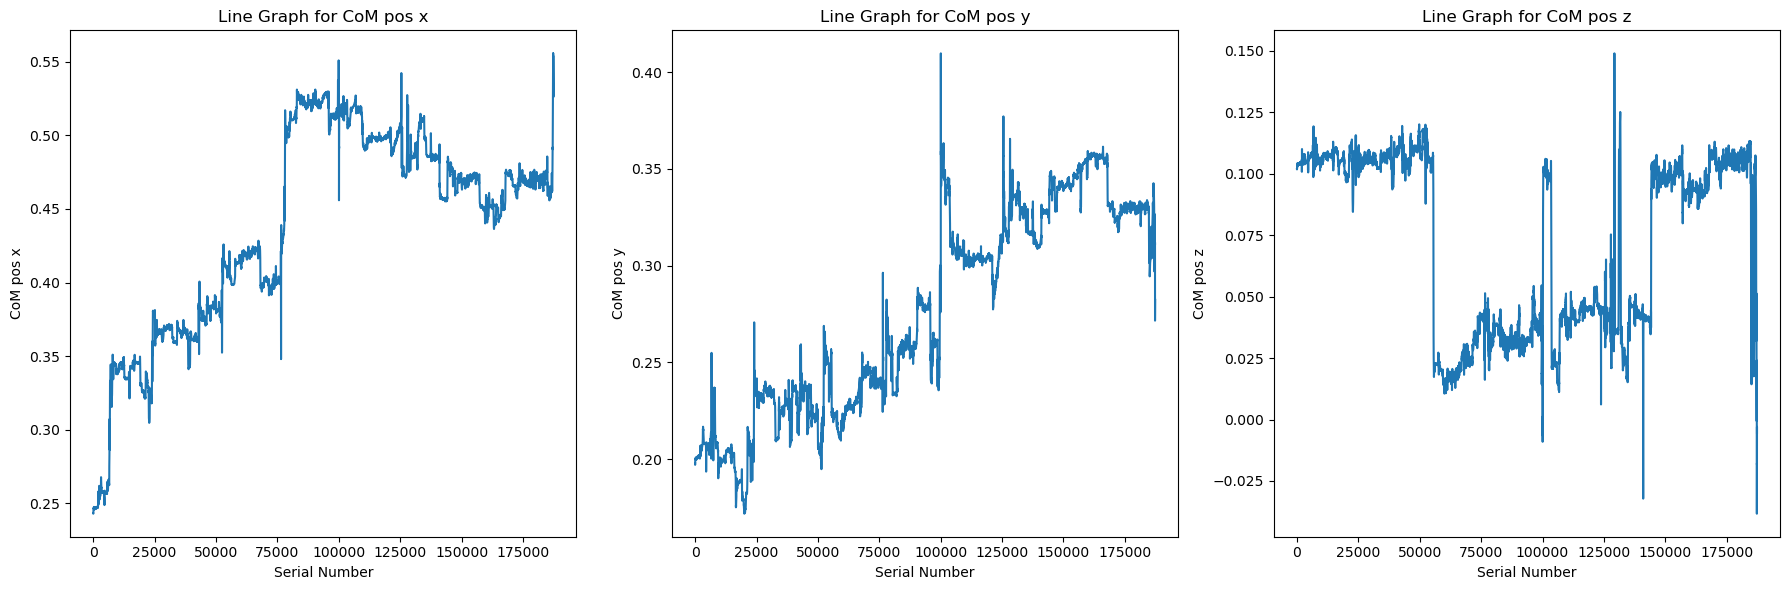

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the updated Excel file into a new DataFrame
df_new = pd.read_excel('Nay_2.xlsx', 'com', engine='openpyxl')

# Reset the index for continuous serial numbers
df_new.reset_index(drop=True, inplace=True)

# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Names of variables to plot
variables = ['CoM pos x', 'CoM pos y', 'CoM pos z']

# Loop through each subplot and variable
for ax, var in zip(axs, variables):
    # No need to filter by 'Frame', just plot the entire data for the variable
    ax.plot(df_new.index, df_new[var])
    
    # Set labels and title for each subplot
    ax.set_xlabel('Serial Number')
    ax.set_ylabel(var)
    ax.set_title(f'Line Graph for {var}')

# Since we're not differentiating by module in this version, we don't need a legend

# Show the plots
plt.tight_layout()  # This ensures that the subplots don't overlap
plt.show()


In [11]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 16 * 3600 + 16 * 60 + 1

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
("16:15:55", "16:17:16"),
("16:17:35", "16:21:04"),
("16:21:35", "16:25:09"),
("16:32:39", "16:33:02"),
("16:33:44", "16:38:42"),
("16:40:04", "16:44:05"),
("16:44:47", "16:50:13"),
("16:51:13", "16:52:01")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(-360, 4500), (5640, 18180), (20040, 32880), (59880, 61260), (63780, 81660), (86580, 101040), (103560, 123120), (126720, 129600)]


In [12]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [(0, 4500), (5640, 18180),
                   (20040, 32880), (59880, 61260),
                   (63780, 81660), (86580, 101040),
                   (103560, 123120), (126720, 129600)]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part13_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part13_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part13_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


In [18]:
import pandas as pd
import re


# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 14 * 3600 + 28 * 60 + 1

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
("14:28:43", "14:30:04"),
("14:30:29", "14:33:57"),
("14:34:47", "14:38:20"),
("14:39:45", "14:41:08"),
("14:42:29", "14:47:27"),
("14:49:00", "14:53:01"),
("14:54:31", "14:59:57"),
("15:01:00", "15:01:47")
    # Add all your intervals here
]


# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules2_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-10-10 14:28:43')
    mocap_start_time = pd.Timestamp('2023-10-10 14:28:00')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part2_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part2_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part2_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [19]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part2_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "2_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part2_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part2_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='2_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!


In [16]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 15 * 3600 + 55 * 60 + 1

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
("15:55:21", "15:56:43"),
("15:57:17", "16:00:47"),
("16:01:22", "16:04:55"),
("16:06:02", "16:07:25"),
("16:08:09", "16:13:07"),
("16:14:13", "16:18:13"),
("16:19:08", "16:24:34"),
("16:26:10", "16:26:58")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(1200, 6120), (8160, 20760), (22860, 35640), (39660, 44640), (47280, 65160), (69120, 83520), (86820, 106380), (112140, 115020)]


In [20]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [(1200, 6120), (8160, 20760),
                   (22860, 35640), (39660, 44640),
                   (47280, 65160), (69120, 83520),
                   (86820, 106380), (112140, 115020)]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part3_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part3_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part3_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


In [1]:
11_2

112

In [2]:
# Define the start time in seconds (14 hours * 3600 + 44 minutes * 60 + 55 seconds)
start_time_seconds = 8 * 3600 + 36 * 60 + 35

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
("8:36:48", "8:38:08"),
("8:38:30", "8:41:59"),
("8:42:33", "8:46:06"),
("8:47:32", "8:48:54"),
("8:49:48", "8:54:45"),
("8:56:01", "9:00:02"),
("9:01:33", "9:06:58"),
("9:14:19", "9:15:07")
    # Add all your intervals here
]

# Calculate frame intervals
frame_intervals = []

for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))

    # Convert start and end times to seconds since the beginning of the day
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s

    # Calculate the frame numbers for the start and end times
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)

    # Store the frame intervals
    frame_intervals.append((start_frame, end_frame))

# Now frame_intervals contains the start and end frames for each module
print("Frame intervals:", frame_intervals)


Frame intervals: [(780, 5580), (6900, 19440), (21480, 34260), (39420, 44340), (47580, 65400), (69960, 84420), (89880, 109380), (135840, 138720)]


In [3]:
import pandas as pd

# Define your frame intervals for each module
frame_intervals = [(780, 5580), (6900, 19440),
                   (21480, 34260), (39420, 44340),
                   (47580, 65400), (69960, 84420), 
                   (89880, 109380), (135840, 138720)]

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Read 'com' data
df_com = pd.read_excel('part11_2.xlsx', 'com', engine='openpyxl')
df_com_labeled = label_modules(df_com)

# Read 'position' data
df_position = pd.read_excel('part11_2.xlsx', 'position', engine='openpyxl')
df_position_labeled = label_modules(df_position)

# Save the dataframes to separate sheets in the same Excel file
with pd.ExcelWriter('part11_2modules.xlsx', engine='openpyxl', mode='w') as writer:
    df_com_labeled.to_excel(writer, sheet_name='com', index=False)
    df_position_labeled.to_excel(writer, sheet_name='position', index=False)


In [1]:
15_2 - 11.18.30 
Nasa PD - 1

152

In [ ]:

AR Modules timestamps  participant 15_2
21 - 11:18:57 to 11:20:18
22 -  11:20:40 to 11:24:09
23 - 11:24:42 to  11:28:15
24 - 11:28:49 to 11:30:11
25 -  11:30:56 to 11:35:53
26 -  11:36:33 to 11:40:33
27 -  11:41:33 to 11:46:58
28 -  11:47:40 to 11:48:28



In [22]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 11 * 3600 + 18 * 60 + 30

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [("11:18:57", "11:20:18"),
("11:20:40", "11:24:09"),
("11:24:42", "11:28:15"),
("11:28:49", "11:30:11"),
("11:30:56", "11:35:53"),
("11:36:33", "11:40:33"),
("11:41:33", "11:46:58"),
("11:47:40", "11:48:28")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules15_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-10-16 11:18:57')
    mocap_start_time = pd.Timestamp('2023-10-16 11:18:30')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part15_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part15_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part15_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [23]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part15_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "15_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part15_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part15_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='15_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '10_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '10_2'!


In [2]:
17_2 - 12.21.35 
Nasa PD - 60

so the slouching score averages should drop to around 40

172

In [3]:
2_2 already top 
Nasa PD - 1

SyntaxError: invalid syntax (1403475525.py, line 1)

In [8]:
10_2 - 12:26:30
Nasa PD - 10

AR Modules timestamps  participant 9_2
21 - 12:26:40 to 12:28:00 
22 -  12:28:19 to 12:31:47
23 - 12:32:35 to  12:36:08
24 - 12:36:39 to 12:38:01
25 -  12:38:55 to 12:43:53
26 -  12:45:08 to 12:49:08
27 -  12:49:46 to 12:55:11
28 -  12:56:06 to 12:56:53 



SyntaxError: illegal target for annotation (1300827970.py, line 1)

In [20]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 12 * 3600 + 26 * 60 + 30

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [("12:26:40", "12:28:00"),
("12:28:19", "12:31:47"),
("12:32:35", "12:36:08"),
("12:36:39", "12:38:01"),
("12:38:55", "12:43:53"),
("12:45:08", "12:49:08"),
("12:49:46", "12:55:11"),
("12:56:06", "12:56:53")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules10_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-10-14 12:26:40')
    mocap_start_time = pd.Timestamp('2023-10-14 12:26:30')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part10_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part10_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part10_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [21]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part10_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "10_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part10_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part10_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='10_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '10_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '10_2'!


In [4]:
20_2 

202

In [5]:
19_2 - 16.54.11
Nasa PD - 80

AR Modules timestamps  participant 9_2
21 - 4:54:14 to 4:55:35 
22 -  4:56:10 to 4:59:38
23 - 5:01:14 to  5:04:48
24 - 5:05:49 to 5:07:12
25 -  5:07:54 to 5:12:52
26 -  5:14:16 to 5:18:17
27 -  5:19:27 to 5:24:53
28 -  5:26:01 to 5:26:48 


so the slouching score averages should drop to around 20

192

In [15]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 16 * 3600 + 54 * 60 + 11

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [("16:54:14", "16:55:35"),
("16:56:10", "16:59:38"),
("17:01:14", "17:04:48"),
("17:05:49", "17:07:12"),
("17:07:54", "17:12:52"),
("17:14:16", "17:18:17"),
("17:19:27", "17:24:53"),
("17:26:01", "17:26:48")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules19_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-10-24 16:54:14')
    mocap_start_time = pd.Timestamp('2023-10-24 16:54:11')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('Part19_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('Part19_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part19_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [17]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part19_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "19_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part19_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part19_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='19_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!


In [6]:
18_2  - 10.44.50
Nasa Pd - 10

AR Modules timestamps  participant 18_2
21 - 10:45:29 to 10:46:49 
22 -  10:48:08 to 10:51:37
23 - 10:52:11 to 10:55:44
24 - 10:56:44 to 10:58:07 
25 -  10:58:50 to 11:03:47
26 -  11:04:38 to 11:08:39
27 -  11:09:43 to 11:15:08
28 -  11:15:47 to 11:16:35 


182

In [25]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 10 * 3600 + 44 * 60 + 50

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [("10:45:29", "10:46:49"),
("10:48:08", "10:51:37"),
("10:52:11", "10:55:44"),
("10:56:44", "10:58:07"),
("10:58:50", "11:03:47"),
("11:04:38", "11:08:39"),
("11:09:43", "11:15:08"),
("11:15:47", "11:16:35")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules18_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-11-03 10:45:29')
    mocap_start_time = pd.Timestamp('2023-11-03 10:44:50')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part18_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part18_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part18_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [26]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part18_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "18_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part18_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part18_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='18_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!


In [ ]:
import pandas as pd

# Load the first Excel file with both sheets (part9_2modulesholo.xlsx)
xls = pd.ExcelFile('part9_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Save both sheets back to the first Excel file
with pd.ExcelWriter('part9_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Define the file path for the second Excel file (part11_2modulesholo.xlsx)
file_path = 'part11_2modulesholo.xlsx'

# Load all sheets from the second Excel file
all_sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Define the participant number value you want to assign
participant_number = "11_2"

# Add the new column to each sheet in the second Excel file and assign the participant number
for sheet_name, data in all_sheets.items():
    data["participant number"] = participant_number

# Save the updated data back to the second Excel file
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    for sheet_name, data in all_sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

print("Processing completed for both Excel files!")


In [7]:
9_2 - 4:41:00
Nasa Pd - 50 

AR Modules timestamps  participant 9_2
21 - 4:41:36 to 4:42:57 
22 -  4:43:16 to 4:46:44
23 - 4:47:13 to 4:50:47
24 - 4:52:04 to 4:53:26
25 -  4:54:19 to 4:59:17
26 -  5:00:12 to 5:04:12
27 -  5:04:59 to 5:10:25
28 -  5:10:57 to 5:11:45 


SyntaxError: illegal target for annotation (3796416722.py, line 1)

In [10]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 16 * 3600 + 41 * 60 + 0

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
    ("16:41:36", "16:42:57"),
("16:43:16", "16:46:44"),
("16:47:13", "16:50:47"),
("16:52:04", "16:53:26"),
("16:54:19", "16:59:17"),
("17:00:12", "17:04:12"),
("17:04:59", "17:10:25"),
("17:10:57", "17:11:45")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules_9_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-10-09 16:41:36')
    mocap_start_time = pd.Timestamp('2023-10-09 16:41:00')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part9_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part9_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part9_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [11]:
'import pandas as pd

# Load the Excel file with both sheets
xls = pd.ExcelFile('part9_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Save both sheets back to the Excel file
with pd.ExcelWriter('part9_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)
'

In [14]:
import pandas as pd
from openpyxl import load_workbook

# Load the 'com' sheet from 'part9_2modulesholo.xlsx'
df = pd.read_excel('part9_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '9_2'
    filtered_df.to_excel(writer, sheet_name='9_2', index=False)

print("Filtered data appended successfully to 'sampletest.xlsx' under the sheet '9_2'!")


Filtered data appended successfully to 'sampletest.xlsx' under the sheet '9_2'!


In [27]:
17_2

12.21.35 -  Motion capture data

Nasa Pd - 60 
the slouching score should drop to 40

AR Modules timestamps  participant 9_2
21 - 12:22:03 to 12:23:24 
22 -  12:23:49 to 12:27:17
23 - 12:27:45 to 12:31:18
24 - 12:32:06 to 12:33:29
25 -  12:34:01 to 12:38:58
26 -  12:39:43 to 12:43:44
27 -  12:44:09 to 12:49:35
28 -  12:50:03 to 12:50:51

172

In [30]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 12 * 3600 + 21 * 60 + 35

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [("12:22:03", "12:23:24"),
("12:23:49", "12:27:17"),
("12:27:45", "12:31:18"),
("12:32:06", "12:33:29"),
("12:34:01", "12:38:58"),
("12:39:43", "12:43:44"),
("12:44:09", "12:49:35"),
("12:50:03", "12:50:51")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules_17_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-11-13 12:22:03')
    mocap_start_time = pd.Timestamp('2023-11-13 12:21:35')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part17_2.xlsx', 'com', engine='openpyxl')
df_position = pd.read_excel('part17_2.xlsx', 'position', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part17_2modulesholo.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [31]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part17_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "17_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part17_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part17_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='17_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!


In [28]:
4_2

10.28.15 - Motion capture 

10.53.50 - Motion capture 2

Nasa Pd - 60 
the slouching score should drop to 40.

AR Modules timestamps  participant 4_2
21 - 10:28:36 to 10:29:57 
22 -  10:30:26 to 10:33:54
23 - 10:34:34 to 10:38:08
24 - 10:55:09 to 10:56:31
25 -  10:57:08 to 11:02:06
26 -  11:03:30 to 11:07:31
27 -  11:08:24 to 11:13:49
28 -  11:14:28 to 11:15:16 

42

In [37]:
import pandas as pd
import re

# Define the start time in seconds (8 hours * 3600 + 36 minutes * 60 + 35 seconds)
start_time_seconds = 10 * 3600 + 53 * 60 + 50

# Define the frame rate
frame_rate = 60

# Define the time intervals for each module in hh:mm:ss format
time_intervals = [
("10:55:09", "10:56:31"),
("10:57:08", "11:02:06"),
("11:03:30", "11:07:31"),
("11:08:24", "11:13:49"),
("11:14:28", "11:15:16")
]

# Calculate frame intervals
frame_intervals = []
for start, end in time_intervals:
    start_h, start_m, start_s = map(int, start.split(":"))
    end_h, end_m, end_s = map(int, end.split(":"))
    start_seconds = start_h * 3600 + start_m * 60 + start_s
    end_seconds = end_h * 3600 + end_m * 60 + end_s
    start_frame = int((start_seconds - start_time_seconds) * frame_rate)
    end_frame = int((end_seconds - start_time_seconds) * frame_rate)
    frame_intervals.append((start_frame, end_frame))

# Function to label modules
def label_modules(df):
    df['Module'] = None
    for i, (start_frame, end_frame) in enumerate(frame_intervals, start=1):
        df.loc[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame), 'Module'] = f'Module {i}'
    return df.dropna(subset=['Module'])

# Hololens Data Processing
def assign_frames_hololens():
    # Load the Hololens data
    df_holo = pd.read_excel('holo/completemodules4_2_2.xlsx', engine='openpyxl')
    df_holo['timestamp'] = pd.to_datetime(df_holo['date'].str.replace("\t", " "), format='[%m/%d/%Y %I:%M:%S %p')

    # Initialize start times
    holo_start_time = pd.Timestamp('2023-09-22 10:55:09')
    mocap_start_time = pd.Timestamp('2023-09-22 10:53:50')

    # Calculate the initial frame counter based on the time difference from the mocap start time
    initial_seconds_offset = (holo_start_time - mocap_start_time).seconds
    frame_counter = initial_seconds_offset * 60  # 60 frames per second

    # Function to assign frame numbers
    def assign_frames(data_slice, start_frame):
        num_data_points = len(data_slice)
        frames = []
        if num_data_points == 1:
            frames.append(start_frame)
        else:
            step = 60 / num_data_points
            for i in range(num_data_points):
                frames.append(round(start_frame + i * step))
        return frames

    # Create a list to hold the frame assignments
    frame_assignments = []

    # Get unique seconds in the Hololens data
    unique_seconds = df_holo['timestamp'].dt.floor('s').unique()

    # Iterate over unique seconds in the Hololens data and assign frame numbers
    for idx, time_sec in enumerate(unique_seconds):
        holo_slice = df_holo[df_holo['timestamp'].dt.floor('s') == time_sec]
        frames_for_slice = assign_frames(holo_slice, frame_counter)
        frame_assignments.extend(frames_for_slice)
        if idx + 1 < len(unique_seconds):
            time_diff = (unique_seconds[idx + 1] - time_sec).astype('timedelta64[s]').astype(int)
            frame_counter += time_diff * 60
        else:
            frame_counter += 60

    # Assign the calculated frame numbers to the dataframe
    df_holo['Frame'] = frame_assignments
    return df_holo

# Function to process and forward-fill dataframes
def process_dataframe(df):
    df['date'] = df['date'].where(df['data'].ne('')).ffill()
    df['data'] = df['data'].where(df['data'].ne('')).ffill()
    df['timestamp'] = df['timestamp'].where(df['data'].ne('')).ffill()
    return df

# Function to extract and generate labels
def label_data(row):
    global last_name
    name = row['temp_name']
    if name:
        short_name = ''.join(filter(str.isupper, name))
        if name != last_name:
            if name not in label_counter:
                label_counter[name] = 0
            label_counter[name] += 1
            last_name = name
        return f"{short_name}{label_counter[name]}"
    return None

def process_sheet(df):
    df['temp_name'] = df['data'].apply(lambda x: re.search(r'Name: (\w+)', str(x)).group(1) if re.search(r'Name: (\w+)', str(x)) else None)
    global label_counter, last_name
    label_counter = {}
    last_name = None
    df['label'] = df.apply(label_data, axis=1)
    return df.drop(columns=['temp_name'])

# Applying all transformations
df_holo = assign_frames_hololens()  # Hololens data processing
df_com = pd.read_excel('part4_2.xlsx', 'com2', engine='openpyxl')
df_position = pd.read_excel('part4_2.xlsx', 'position2', engine='openpyxl')
df_com_labeled = label_modules(df_com)
df_position_labeled = label_modules(df_position)
result_com = pd.merge(df_com_labeled, df_holo, on='Frame', how='left')
result_pos = pd.merge(df_position_labeled, df_holo, on='Frame', how='left')
result_com = process_dataframe(result_com)
result_pos = process_dataframe(result_pos)
com_df = process_sheet(result_com)
position_df = process_sheet(result_pos)

# Save the final data
with pd.ExcelWriter('part4_2modulesholo2.xlsx', engine='openpyxl') as writer:
    com_df.to_excel(writer, sheet_name='com', index=False)
    position_df.to_excel(writer, sheet_name='position', index=False)

print("Data processing completed!")


Data processing completed!


In [38]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file with both sheets
xls = pd.ExcelFile('part4_2modulesholo.xlsx', engine='openpyxl')
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Apply the transformation to both sheets
for sheet_name, data in sheets.items():
    if sheet_name in ['com', 'position']:
        data['panel'] = data['label'].str.extract('([a-zA-Z]+)')
        data['count'] = data['label'].str.extract('(\d+)')
        sheets[sheet_name] = data

# Define the participant number value you want to assign
participant_number = "4_2"

# Add the new column to each sheet and assign the participant number
for sheet_name, data in sheets.items():
    data["participant number"] = participant_number

# Save both sheets back to the Excel file with participant number added
with pd.ExcelWriter('part4_2modulesholo.xlsx', engine='openpyxl') as writer:
    for sheet_name, data in sheets.items():
        data.to_excel(writer, sheet_name=sheet_name, index=False)

# Load the transformed 'com' sheet from 'part19_2modulesholo.xlsx'
df = pd.read_excel('part4_2modulesholo.xlsx', sheet_name='com')

# Filter rows where the 'panel' column is "CP"
filtered_panel_df = df.loc[df['panel'] == 'CP']

# Filter columns as specified
filtered_df = filtered_panel_df[['Frame', 'CoM pos x', 'CoM pos y', 'CoM pos z', 'Module', 'date', 'data', 'label', 'panel', 'count', 'participant number']]

# Define the file path for the Excel file (sampletest.xlsx)
file_path = 'sampletest.xlsx'

# Use openpyxl to load the workbook
book = load_workbook(file_path)

# Use pandas ExcelWriter with the openpyxl engine, passing the book object
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}
    
    # Write the filtered dataframe to a new sheet named '19_2'
    filtered_df.to_excel(writer, sheet_name='4_2', index=False)

print("Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!")


Transformations applied and filtered data appended successfully to 'sampletest.xlsx' under the sheet '19_2'!
